<a href="https://colab.research.google.com/github/beethofen/Alvin_Kuo_Portfolio/blob/main/Alvin_Kuo_Capstone_Notebook_Deep_Learning_Final_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project: CNN Malaria Detection**
## **Context** 
Malaria is a contagious disease caused by Plasmodium parasites that are transmitted to humans through the bites of infect ed female Anopheles mosquitoes. The parasites ener the blood and begin damaging red blood cells (RBCs) that carry o xygen, which can result in respiratory distress and other complications. The lethal parasites can stay alive for more than a year in a person’ s body without showing any symptoms. Therefore, late treatment can cause complications and could even be fatal. Almost 50% of the world's population is in danger from malaria. There were more than 229 million malaria cases and 400,000 malaria-related deaths reported over the world in 2019. Children under 5 years of age are the most vulnerable population group affected by malaria; in 2019 they account ed for 67% of all malaria deaths worldwide. Traditional diagnosis of malaria in the laboratory requires careful inspection by an experienced professional to discriminate between healthy and infected red blood cells. It is a tedious, time-consuming process, and the diagnostic accuracy (which heavily depends on human expertise) can be adversely impacted by inter-observer variability . An automated system can help with the early and accurate detection of malaria. Applications of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) have consistently shown higher accuracy than manual classification. It would therefore be highly beneficial to propose a method that performs malaria detection using Deep Learning Algorithms.
## **Objective** 
Build an efficient computer vision model to detect malaria. The model should identify whether the image of a red blood cell is that of one infected with malaria or not, and classify the same as parasitized or uninfected, respectively


# **Milestone 1**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
* **a) In 2020, it’s estimated 241 M Malaria cases and 267 K deaths world wide**
* **b) Microscopy is the golden standard for detection relies on lab. Average labs may not have availability or capability for result within hours**
* **c) Faster and more accurate automation becomes vital for treatment of Malaria**
* **d) Deep Learning CNN model may suit well to mitigate this gap of demand**
 
**The objectives:** What is the intended goal?<br>

* **a) Fast Detection** - To provide prompt detection for potential patients. The goal is to provide the results within minutes faster than hour-long operation
* **a) Accurate Detection** - To provide precise detection for potential patients. The goal is at least 90% both in accuracy and recall(sensitivity) - which is the best non-machine learning can do

**The key questions:** What are the key questions that need to be answered?<br>

* **1) Why could Data Science could help to solve the Malaria Detection problem?**
* **2) Will Deep Learning the right solution for this problem?**
* **3) Is CNN (Convolutional Neural Network) the best approach?**
* **4) What exactly the benefit we could draw from this approach in comparison to conventional approaches?**

**The problem formulation:** What is it that we are trying to solve using data science?

* **1) How to utilize the data science to deal with large volume of digital image classification?**
* **2) How to successfully perform data exploration and image processing before modelling?**
* **3) How to utilize Deep Learning to build up an automatic system?**
* **4) How to utilize CNN’s strength to detect malaria?**
* **5) Could we reach the goal of faster and more accurate detection with the whole project?**


## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


##<b> Mount the drive

In [ ]:
# Mount the drive
# Leverage GCP (Google Cloud Platform)
# More efficient in comparison to using local PC or laptop since it's anytime anywhere
# Doable to try AWS or Azure (out of the scope of this project) for production as next step after the project

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b>Load the libraries</b>

In [ ]:
# Import libraries required to load the data

# zipfile is to unzip the zip file
# os is to folder path operation

import zipfile
import os

# PIL is the Python Imaging Library
# PIL provides the python interpreter with image editing capabilities
# Image module provides a number of function like open, rotate, thumbnail...to operate the PIL images 

from PIL import Image

# Two basic Python Libraries: numpy, pandas, 
# Two basic visualization libraries: plt and sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train/test split for cross validation

from sklearn.model_selection import train_test_split

# tensorflow and keras API related modules
# Sequential API allows us to create model layer by layer
# Keras layers includes convolution, pooling, regularization and flatten

# relu, softmax (and/or sigmoid) activation functions are built-in, no need to import
# relu (for example) could be either in a activation layer or in an activation argument
# LeakyReLU activation function is classified as advanced activation, can't be in activation layer. 
# We have to import LeakyReLU activation specifically under keras.layeres

# GlobalAvgPool2D is a special layer but easily to be mixed with flatten

# to-categorical under keras.utils is for one-hot encoding

# plot_model under keras.utils is for plotting model which is easily visualized

# optimizers under keras could bring in all kinds of optimizers including Adam, SGD and more

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

# backend utility helps to clear the session to release the global state
# callbacks is an API to performa various stage at training
# EarlyStopping is a class to help stop training if metrics monitored is not improving
# ModelCheckpoint helps to save the weights while training using model.fit()

from tensorflow.keras import backend 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# random and shuffle aim at randomness need

import random
from random import shuffle

# classification_report and confusion_matrix are helping to measure the performances

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Ignore warnings to avoid lengthy red notes

import warnings
warnings.filterwarnings('ignore')

# display.max_rows and display.max_columns sets the maximum number of rows and columns displayed
# Replace truncated lines by an ellipsis
# Remove the limit from the number of displayed columns 
# See the entire dataframe while printing it
# Set the limit from the number of displayed rows 20 to save space

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

* **GlobalAvgPool2D**: 
* **1. Take advantage of each feature map** - Global Average Pooling is a pooling operation designed to replace fully connected layers in classical CNNs. The idea is to generate one feature map for each corresponding category of the classification task in the last mlpconv layer. Instead of adding fully connected layers on top of the feature maps, we take the average of each feature map, and the resulting vector is fed directly into the softmax layer.

* **2. More Native** - One advantage of global average pooling over the fully connected layers is that it is more native to the convolution structure by enforcing correspondences between feature maps and categories. Thus the feature maps can be easily interpreted as categories confidence maps. Another advantage is that there is no parameter to optimize in the global average pooling thus overfitting is avoided at this layer. 
* **3. More robust** - Furthermore, global average pooling sums out the spatial information, thus it is more robust to spatial translations of the input.

## <b>Load the data</b>

In [ ]:
# Save images file zip format in Google drive
# Store the path of the data file from the Google drive

path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file
# Extract the files from the zip file

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

### **The extracted folder** -  has be setup as different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

### **The size of all images** -  must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

### **Training data first** - then we will use the same code for the test data as well.

### **Load train images and labels**

In [ ]:
# Store the extracted "train" folder path
train_dir = '/content/cell_images/train'

# Set the image size so that each image has the same size
# Capitalize the variable to avoid potential confusion
# 64 normally works, but 
# Some pre-trained models requires 224/331 (MobileNet, NASNetMobile/Large), then 64 is not large enough

SIZE = 64

# Create empty list to store the training images after being converted to NumPy arrays
train_images = []

# Create empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# Run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Define folder path
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            # Open each image with image path
            image = Image.open(train_dir + folder_name + image_name)

            # Resize each image to (64,64)
            image = image.resize((SIZE, SIZE))

            # Convert images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Create labels for parasitized and uninfected images
            if folder_name =='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

# Convert the lists to arrays

train_images = np.array(train_images)
train_labels = np.array(train_labels)

### **Load test images and labels**

In [ ]:
# Store the extracted "test" folder path
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Create empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Create empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# Run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Folder path
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            # Open each image with image path
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resize each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Convert images to arrays and append the array to the empty list defined above
            test_images.append(np.array(image))
            
            # Create labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

### **Convert lists to arrays**

In [ ]:
# Convert lists to arrays

test_images = np.array(test_images)
test_labels = np.array(test_labels)

###<b> Check the shape of train and test images

In [ ]:
# Shape of images

print("The shape of train images = ", train_images.shape)
print("The shape of test images = ", test_images.shape)

The shape of train images =  (24958, 64, 64, 3)
The shape of test images =  (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [ ]:
# shape of labels 

print("The shape of train labels = ", train_labels.shape)
print("The shape of test labels = ", test_labels.shape)

The shape of train labels =  (24958,)
The shape of test labels =  (2600,)


### **Observations and insights:** 
* **1. Shape of Train Images** - We have 4 dimensions: 
 * **24,958** - We have 24,958 images in train set. 
 * **64, 64** - We have 64 pixels and 64 pixels each in width and length.
 * **3** - We have R(Red), G(Green) and B(Blue) three basic colors/channels to identify a color.
* **2. Shape of Test Images** -  We have 4 dimensions, the same as train set: 
 * **2,600** - We have 2,600 images in test set. 
 * **64, 64** - We have 64 pixels and 64 pixels each in width and length, the same as train set.
 * **3** - We have R(Red), G(Green) and B(Blue) three basic colors/channels to identify, the same as train set. 
* **3. Shape of Train labels** - We have 1 dimension: 
 * **24,958** - We have 24,958 labels in train set. 
* **4. Shape of Test labels** - We have 1 dimension: 
 * **26,00** - We have 2,600 labels in train set.

### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Use min and max function from numpy

smallest_tr = train_images.min(axis=0).min(axis=0).min(axis=0).min(axis=0)
largest_tr = train_images.max(axis=0).max(axis=0).max(axis=0).max(axis=0)
print("The range of train images pixel values is = ", "(", smallest_tr, ",", largest_tr, ")")

smallest_te = test_images.min(axis=0).min(axis=0).min(axis=0).min(axis=0)
largest_te = test_images.max(axis=0).max(axis=0).max(axis=0).max(axis=0)
print("The range of test images pixel values is = ", "(", smallest_te, ",", largest_te, ")")

The range of train images pixel values is =  ( 0 , 255 )
The range of test images pixel values is =  ( 0 , 255 )


### **Observations and insights**: 
* **1. Train/Test Images Range of Pixel Values** - We utilize numpy min and max function to find out both are (0, 255)
* **2. Matching instinct** - We have 8 bits to be on or off. So it's 2**8 = 256 which is from 0 to 255.



###<b> Count the number of values in both uninfected and parasitized 

In [ ]:
# Use value_counts to count the values

print("train_labels: 1 = parasitized, 0 = uninfected")
print(pd.Series(train_labels).value_counts())
print(pd.Series(train_labels).value_counts(normalize= True))
print("="*20)
print(pd.Series(test_labels).value_counts())
print("test_labels: 1 = parasitized, 0 = uninfected")
print("")
print(pd.Series(test_labels).value_counts(normalize= True))

# Use value_counts(normalize = True) to see if it's balanced

train_labels: 1 = parasitized, 0 = uninfected
1    12582
0    12376
dtype: int64
1    0.504127
0    0.495873
dtype: float64
1    1300
0    1300
dtype: int64
test_labels: 1 = parasitized, 0 = uninfected

1    0.5
0    0.5
dtype: float64


###<b>Normalize the images

In [ ]:
# Normalize the train and test images by dividing it by 255 
# Convert them to float32 using astype function

train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

### **Observations and insights:**
* **1.Balanced Data - Uninfected and parasitized Value Counts in Train Set** - With numpy value_counts, we found the numbers of both classes are 12,582 and 12,376 each, which is 50.4% vs 49.6% - very balanced.
* **2. Balanced Data - Uninfected and parasitized Value Counts in Test Set** - With NumPy value_counts, we found the numbers of both classes are 1300 and 1300 each, which is exactly 50% - very balanced, as well.
* **3. Normalization to make computation fast and easy** - We can normalize the values to range from 0 to 1. In this way, the numbers will be small and the computation becomes easier and faster. We divide all the values by 255 will convert them to a range from 0 to 1.
* **4. Covert uint8 to float32 to match array in machine learning** - The whole math for neural networks is continuous, not discrete, and this is best approximated with floating-point numbers. The inputs, outputs, and weights of a neural network are continuous numbers. In some scenarios we might get errors if we do not cast the inputs to the expected types - float32 is safer.
* **5.Conclusion** - We don't need to deal with the imbalanced data. Now we have fewer chances of being biased toward a particular class. We successfully normalize it between 0 and 1 and it's the better type float32. Everything is ready!

###<b> Plot to visualize if the data is balanced

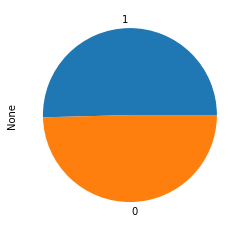

In [ ]:
# Bar plot, pie-plot or count plot, all doable to plot the labels of train and test data
# Check if they are balanced with visualization

pd.Series(train_labels).value_counts(normalize= True).plot(kind = 'pie')

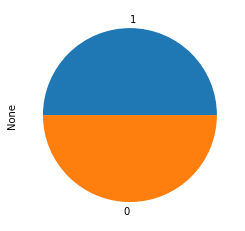

In [ ]:
pd.Series(test_labels).value_counts(normalize= True).plot(kind = 'pie')

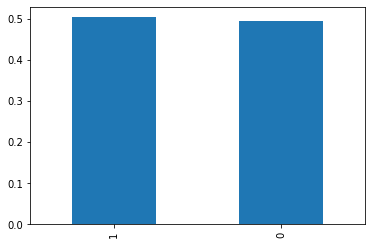

In [ ]:
pd.Series(train_labels).value_counts(normalize= True).plot(kind = 'bar')

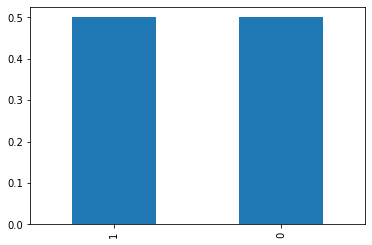

In [ ]:
pd.Series(test_labels).value_counts(normalize = True).plot(kind = 'bar')

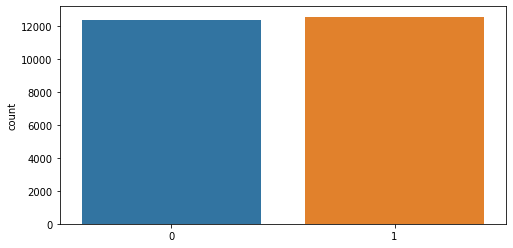

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = train_labels)
plt.show()

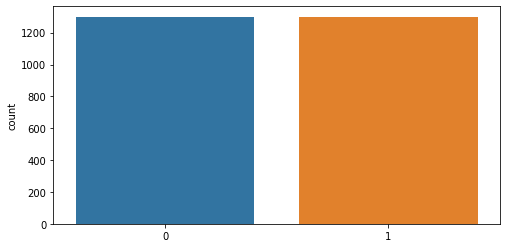

In [ ]:
plt.figure(figsize = (8, 4))
sns.countplot(x = test_labels)
plt.show()

### **Observations and insights:**
* **1.Pie Plot, Balanced Data** - It's obviously seen it's an almost 50/50 pie chart and we could visualize that it's balanced data.
* **2.Bar Plot, Balanced Data** - It's ready to be seen it's an almost bar chart with a side-by-side comparison. We could visualize that it's balanced data.
* **3.Count Plot, Balanced Data** - It's ready to be seen it's an almost count chart with a side-by-side comparison. We could visualize that it's balanced data.
* **4.Overall, a Pie chart is my first choice** - I would prefer a pie chart more than a bar/counterplot in practice because of direct comparison and visualization at once instead of side-by-side comparison.

## <b>Data exploration</b>
Visualize the train images

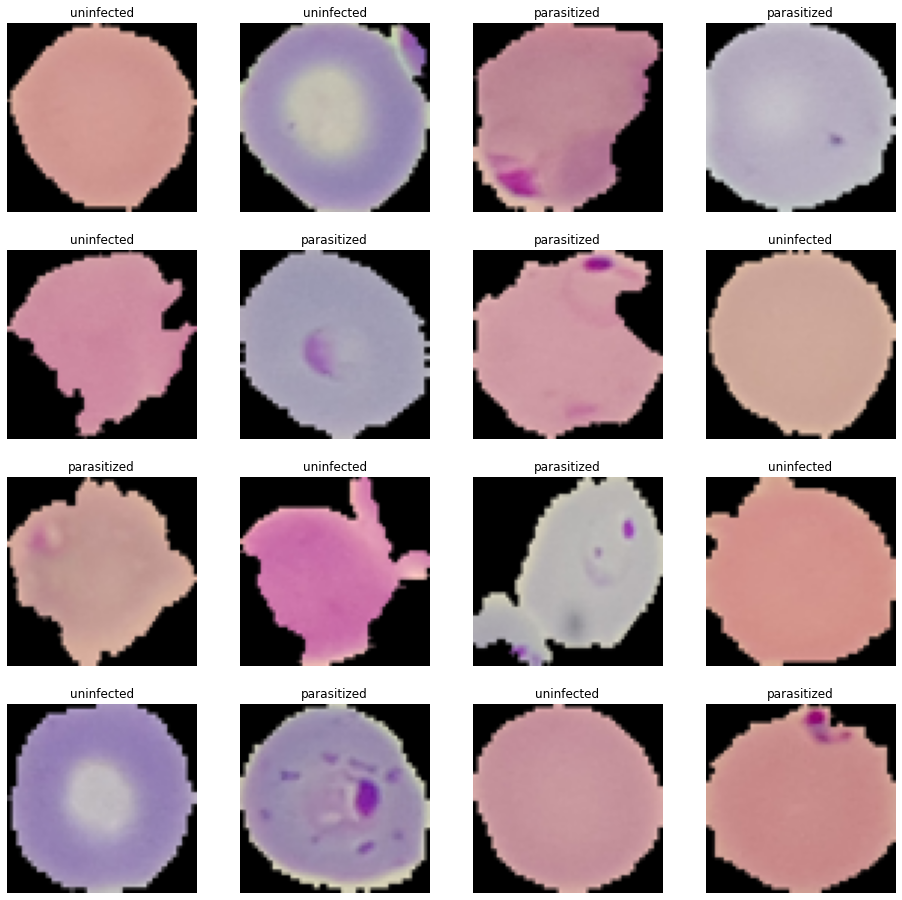

In [ ]:
# Visualize both the parasitized and uninfected images
# train_images.shape[0] is 24958, the total train images count
# With np.random.seed(42), it shows all the same image when running np.random.randint()

np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off') 

# plt.axis('off') to focus in the image itself
# Showing 10, 20 30, or 40, 60 for 64 x 64 is not our focus

### **Observations and insights:**
* **1.Visualization for differences between 2 classes** - majorly the existence of the Giemsa Stain. All the cell color, shape, texture, size, curve, edge are NOT the factors to influence classification.
* **2.Detectable by naked eyes, but time-consuming and still risky** - With the 16 pictures as an example, we do detect by naked eye to some degree. But we can still claim some risks like picture (3,2) could be mislead to parasitized. The picture (4,4) could be ignored and mislead to uninfected if human eye needs to process big volume and under pressure or light factor.
* **3.Machine learning could help** - We believe if we utilize machine leanring to train and learn, eventually the accuracy could be higher than human naked eye. It's faster and more accurate and we could save the problems of the lab location, human working hours to overcome time urgency and accuracy issues.

###<b> Visualize the images with smaller subplot and figsize

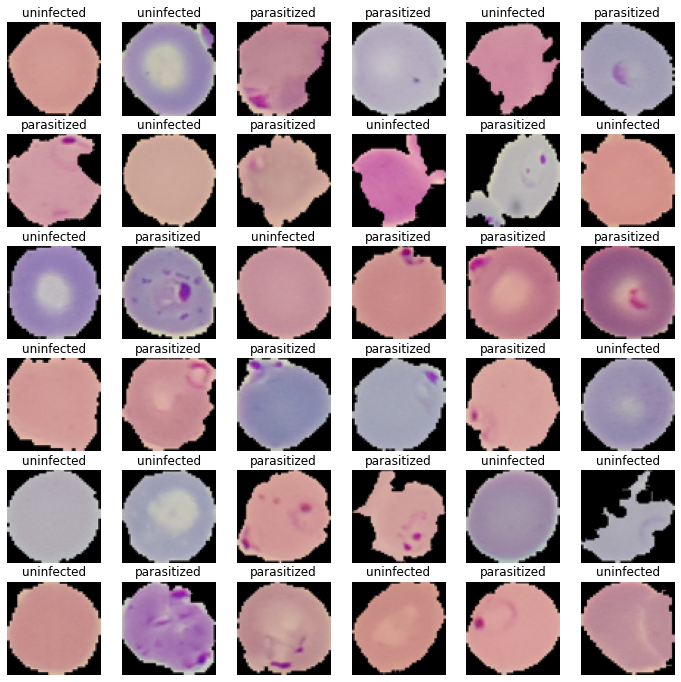

In [ ]:
# Change subplot and figsize

np.random.seed(42)
plt.figure(1, figsize = (12, 12))

for n in range (1, 37):
    plt.subplot (6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1:
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off') 

### **Observations and insights:**
* **1. Subplot(6,6) instead of (4,4)** - We could display more images (125% more) at one time from 16 to 36 - which is more than double to glance and draw conclusion easier.
* **2. Figsize=(12,12) instead of (16, 16)** - We could display smaller images at one time like reduce from 256 pixels to 144 pixels (44% less) - which is almost half spaces more available to glance and draw conclusion easier.
* **3. Two fine-tune actions needed to do it at the same time** - The technique we learned is we shoud always increase the subplot while reduce the figure size.

###<b> Prepare to plot the mean images for parasitized and uninfected

In [ ]:
# firstly define a function to find the mean of image

def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

### <b> Calculate and show the mean image for parasitized

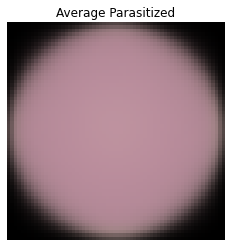

In [ ]:
# If the label = 1 then the image is parasitised
# If the label = 0 then the image is uninfected

# Create a list to store the parasitized data

parasitized_data=[]     

for img, label in zip(train_images, train_labels):
        if label==1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   

# Find the mean

In [ ]:
# parasitized_mean is still a 3-D array with the shape of (64, 64, 3)

print(parasitized_mean.shape)

(64, 64, 3)


In [ ]:
# parasitized_mean is a 3-D array with all the floating numbers

print(parasitized_mean)

[[[0.07455095 0.05619138 0.05547608]
  [0.06922588 0.05269433 0.05221745]
  [0.14679701 0.1103958  0.11278016]
  ...
  [0.23732316 0.19138452 0.18653632]
  [0.1475918  0.11603879 0.11111111]
  [0.08925449 0.06763631 0.06525195]]

 [[0.08297568 0.06310602 0.06270863]
  [0.16237482 0.12096646 0.12199968]
  [0.37378795 0.28532825 0.2925608 ]
  ...
  [0.44190113 0.3605945  0.35113654]
  [0.23501828 0.18955651 0.18534414]
  [0.14099507 0.11095215 0.10681927]]

 [[0.13193451 0.09958671 0.09712287]
  [0.34771896 0.26164362 0.25886187]
  [0.75806708 0.58384994 0.59179781]
  ...
  [0.75552376 0.61476713 0.59744079]
  [0.3892068  0.31417899 0.306708  ]
  [0.13908759 0.10848832 0.10546813]]

 ...

 [[0.18081386 0.1371801  0.14012081]
  [0.28127484 0.21467175 0.21745351]
  [0.56088062 0.43760928 0.44198061]
  ...
  [0.64687649 0.51955174 0.52742012]
  [0.35844858 0.28564616 0.28707678]
  [0.14433317 0.10983945 0.10793197]]

 [[0.07725322 0.05778096 0.05809887]
  [0.12692736 0.09577174 0.09759975]


### <b> Calcualte and show the mean image for uninfected

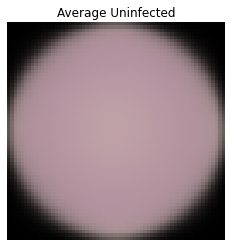

In [ ]:
# Similarly find the mean image of uninfected

uninfected_data= []
for img, label in zip(train_images, train_labels):
        if label == 0:
              uninfected_data.append([img])
    
uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')

### **Observations and insights:**
* **1. Mean Image is an option of data exploration** - The 2nd approach we could do better data exploration (with visualization) is to utilize the mean image to compare two classes.
* **2. The human eye may not easily detect the difference** - Since the image has been decoded as a number, we could easily calculate the mean image conceptually. We do find it's slightly darker in parasitized than the uninfected - which is pretty reasonable because there are parasites to be detected in darker color as a stain. Theoretically, it would be darker. However since it would be spotted, after average, the effect won't be that significant.

## <b>Convert BGR to HSV of Images using OpenCV

### <b> Convert the train images first and see both classes

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(1,train_images.shape[0],1):
  a = cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx = np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


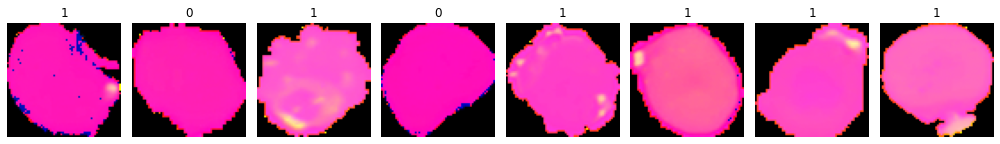

In [ ]:
viewimage= np.random.randint(1,train_images.shape[0],8)
fig,ax= plt.subplots(1,8,figsize=(14,14))

for t,i in zip(range(8),viewimage):
  Title= train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

### <b> Convert the test images next in both classes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


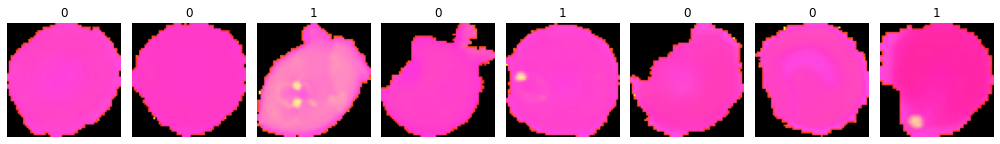

In [ ]:
# Similarly visualize for test images

gfx2=[]
for i in np.arange(0, test_images.shape[0], 1):
  a2= cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  gfx2.append(a2)
gfx2 = np.array(gfx2)

viewimage2 = np.random.randint(1, test_images.shape[0], 8)
fig, a2x = plt.subplots(1, 8, figsize = (14, 14))
for t, i in zip(range(8), viewimage2):
  Title2 = test_labels[i]
  a2x[t].set_title(Title2)
  a2x[t].imshow(gfx2[i])
  a2x[t].set_axis_off()
  fig.tight_layout()

### **Observations and insights:** 
* **1. Open CV** -
 * **1) Software Library** - OpenCV(Open Source Computer Vision Library) is an open-source computer vision and machine learning software library.
 * **2) Image-focused Task** - It's a great tool for image processing and performing computer vision tasks like face detection, objection tracking, landmark detection, and much more.
  * **3) Supporting Language** - It supports multiple languages including python, java C++.
* **4) Rich Portfolio of Algorithm to Choose** - More than 2,500 algorithms to choose including image and video purposes.
* **2. cv2** - cv2 is the 2nd version of the whole OpenCV library which makes the cv a subset of the cv2.
* **3. cvtColor() Method** - cvtColor is one of the 150 color space conversion methods to convert from one color space to the other (Here we covert from BGR to HSV) (It's worthy to note that OpenCV lays out "BGR" instead of "RGB" which we normally call)
* **4. COLOR_BGR2HSV to convert from BGR to HSV** - COLOR_BGR2HSV, the parameter we used, is listed as the #40 enumerators among the 143. Source: https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html
* **5. HSV** - HSV stands for "Hue, Saturation, Value". In comparison to BGR, it's another color model. Both HSV and BGR define color spaces.
* **6. HSV may be preferred to BGR** - The HSV model describes colors similarly to how the human eye tends to perceive color. BGR defines color in terms of a combination of primary colors (Red, Green, and Blue). In situations where color description plays an integral role, the HSV color model is often preferred over the BGR model. That's why we try HSV here.
* **7. Code changes to make parasitized and uninfected comparison more visible** - I change the code from 100 to train_images.shape[0] or test_images.shape[0] to avoid only visualization of parasitized, but random two classes. It's much better to visualize both to examine the details.
* **8. We're looking for stain with yellow/light color** - After conversion, human eyes (or computer vision) start(s) to look for yellow/light color spot as the original Giemsa stain
* **9. Conclusion** - We feel it's much easier to catch the parasitized with the effect of hue, saturation with the value differences.

## **Process Images using Gaussian Blurring**

#### **Gaussian Blurring on train data in both classes**

In [ ]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,train_images.shape[0],1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

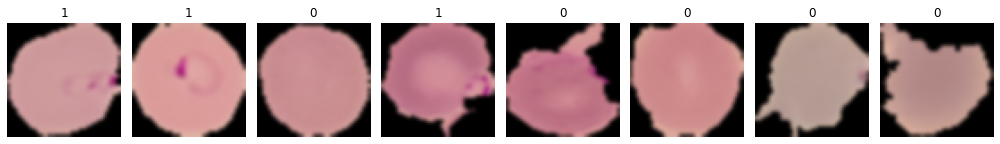

In [ ]:
viewimage=np.random.randint(1,train_images.shape[0],8)
fig,cx= plt.subplots(1,8,figsize=(14,14))
for t,i in zip(range(8),viewimage):
  Title3= train_labels[i]
  cx[t].set_title(Title3)
  cx[t].imshow(gbx[i])
  cx[t].set_axis_off()
  fig.tight_layout()

### **Gaussian Blurring on test data in both classes**

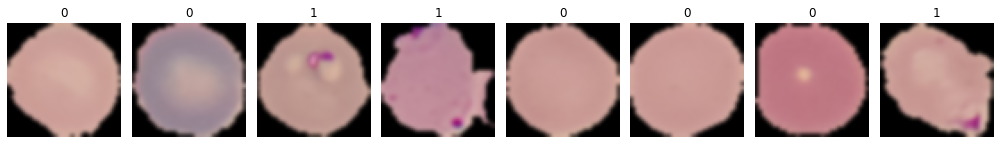

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx2=[]  ## to hold the blurred images
for i in np.arange(0,test_images.shape[0],1):
  b2= cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx2.append(b2)
gb2x=np.array(gbx2)

viewimage=np.random.randint(1,test_images.shape[0],8)
fig,cx= plt.subplots(1,8,figsize=(14,14))
for t,i in zip(range(8),viewimage):
  Title4= test_labels[i]
  cx[t].set_title(Title4)
  cx[t].imshow(gbx2[i])
  cx[t].set_axis_off()
  fig.tight_layout()

### **Observations and insights:**
* **1. GaussianBlur** - GaussianBlur is one image smoothing (or blurring) technique from OpenCV to help in reducing the noise.
* **2. Purpose of the GaussianBlur** - Since this method could reduce the noise, edges, and detail, the purpose is to focus more on the structure.
* **3. Algorithm Behind** - To implement the gaussian blur, we take the Gaussian function and compute one value for each of the elements in the kernel specified. Usually, we assign the maximum weight to the central element in the kernel and values close to zero for the elements at the kernel borders.
* **4. Parameteres** - cv2.GaussianBlur(src, ksize, sigmaX, sigmaY, borderType)
 * **1) src** - Source/Input of n-dimensional array. (Here it's train_images[i] and test_images[i])
 * **2) ksize** - Kernel is a matrix of an (odd and positive no. of rows)*(odd and positive no. of columns) order. (Here the kernel size is (5, 5)=> odd number! Correct!). After testing larger kernel sizes like (15, 15), or (55, 55) even (95, 95), we found that the kernel is in a completely wrong direction to detect since we want details.
 * **3) SigmaX/Y** - sigmaX/Y: Standard deviation value of kernel along horizontal/vertical direction. After testing, the higher number also does not help better detection.
 * **4) Border Type** - it's for image boundaries. We don't specifically tune this parameter here.
* **5. Source**: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1
* **6. Conclusion** - The reality is we do not gain too much from the Gaussian technique since our specific need for parasitized images really requires detail - even it's a small spot or tiny curve. We may look for other techniques or methods to apply for our dataset for better data exploration


# **Milestone 2**

## **Preparae Modelling**

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Encode train labels and test labels
# This step has to be after data augmentation to avoid label confusion

train_labels = to_categorical(train_labels, 2)
test_labels = to_categorical(test_labels, 2)

## **Proposed approach**

* **Potential techniques:** Here are all the different techniques we should explore:
 * **0. Collecting and Preparing the data** - Those are what we did so far already. We just do one hot encoding before the modelling.
 * **1. Choose a Model** - We list out all the overall solution designs and potential models. Choose by the sequence to train one by one.
 * **2. Train and test the model** - Build up the model (with layers and parameters), train and fit the model. The history of epochs with all the cross validations will leave the traces for us to track and measure later on.
 * **3. Evaluate the model** - With reading all the test accuracy information, train and validation curve, technique of reading the  classification report and confusion matrix.
 * **4. Model Tuning** - There are many factors we could tune to make the model better. Here are:
   * **a. Layer** - We could add, reduce or restructure various types of layers like convolution layer, pooling layers (Max Pooling, GobalAvgPooling), dense layers, layers for regularization (Dropout, BatchNormalization) and layers of activation (only for built-in). 
   * **b. Hyperparameter** - For the parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. For example:
     * **a) Dense layer neuron** - Normally it's 16, 32, 64, 128, 512 as power of the 2. It normally starts from more neuron then converge to smaller amount of neuron in the top of the layers before output layer.
     * **b) Dense layer activation** - relu, LeakyReLU...
     * **c) Dropout layer percentage** - From 0.2, 0.3, 0.5, 0.8...The higher the percentage to dropout, the potential stronger effect to regularize the overfitting. However, it could bring in the potential loss of the information of the weights. We have to find the balance.
     * **e) Optimizers when fitting** - Adam, SGD...Adam tends to converge faster. However, SGD seems stably generalizing better in some cases.
     * **f) Learning rate when fitting** - We normally start from 0.001, but we may try slower to 1e-4 or 1e-5 if we have risk of stucking in the local minimum.
     * **g) Batch Size** - We normally do 32, we could reduce to 16, or increase to 64. Noramlly a smaller batch size has the implicit regularization effect to avoid overfitting.
     * **h) validation split** - 0.1 could train more data to combato overfitting. 0.2 would be more the starting point.
     * **i) patience in EarlyStopping** - Normally we start from 2. It could be 4, 5, or longer to wait for potential getting rid of local niminum
* **Overall solution design:** The potential solution design are listed as follows:
 * **1. ANN Model** - ANN (Artificial Neural Network) uses weights and an activation function for the bulk of its method. It artificially reconstructs how a brain’s neural network works. It keeps going back and changes the way it learned by the weights after each iteration through the neuron in ANN depending on the accuracy calculated by the cost function. Though we presumbly know ANN could be as efficient as CNN to work on spatial need. We still want to explore it first from a simple ANN model.
 * **2. Basic CNN model** - CNN (Convolutional Neural Network) casts multiple layers on images and uses filtration to analyze the image inputs. These layers are all kinds of math layer, rectified linear unit layer, and fully connected layer. The purpose of these layers is to understand patterns that the network can “see”, process output of data, and provide an n-dimensional vector output. We will start from a basic one to fine-tune the direcdtion for further variation.
 * **3. Deeper CNN model** - The logic of "deeper" means "more layers". We will explore how it goes when substantially more layers. Our approach is to fix the same logic, but simply deeper/more to see if it keep the improvements of the model.
 * **4. CNN Model with LeakryReLU and BatchNormalizatoin** - This is the starting point to use an "advance activation" and modify the "regularization technique". It could flag our new direction, or not.
 * **5. CNN Model with Augemntation** - This is another crucial milestone to utilize the augementation technique as a new approach to improve the model as part of the exploration.
 * **6. Pre-trained models for transfer learning** - It's probably the best part of the capstone project. "If I have seen further it is by standing on the shoulders of Giants". Pre-trained models are the giants we will count on. We will select the feasible models (including the right pixel requireemnt and results). 
   * **a. VGG16** - In 2014, VGGNet (Invented by VGG, Visual Geometry Group from University of Oxford) showcased as the 1st runner-up of the ILSVRC (ImageNet Large Scale Visual Recognition Competition) 2014 in the classification task, which has significantly improvement over 2013 winner ZFNet and 2012 winner AlexNet. VGGNet also beats the GoogLeNet and won the localization task in ILSVRC 2014. The error rate was firstly lower than 10%. This 16 convolution layers model helps us as the excelletn cornorstone of the transfer learning exploration.
   * **b. VGG19** - It's important to test if the VGG19, the 19-convolution-layer model, works beter for Malaria detecdtion.
   * **c. ResNet50** - In 2015, ResNet introduced skip connection (or shortcut connection) to fit the input from the previous layer to the next layer without any modification of the input. Skip connection enables to have deeper network and finally ResNet becomes the Winner of ILSVRC 2015 in image classification, detection, and localization, as well as Winner of MS COCO 2015 detection, and segmentation. ResNet means "Residual Network". There are 50 layers. It's the starting point to try ResNet as more series of the pre-trained models.
   * **d. ResNet101** - It's helpful to est if the ResNet122, the 101-layer model could even perform better than the 50-layer original model.
   * **e. DenseNet121** - In 2017, DenseNet was released to introduce the benefit of 1)Strong greadient flow, 2) parameter and computatoinal efficiency, 3) Maintains low complex features. It utilizes concaternation of the layers instead of the summation of the layers like what ResNet did.
   * **f. DenseNet201** - It's worthy to try if the 201-layer DenseNet is better than original 121-layer veresion.
* **Data Augmentation** - To use augmented data to see if the model performance improves is always a good idea to compare in search of the best final model. <br>
* **Measures of success:** - The key measures of success to compare different techniques have to be meaningful with regard to Malaria detecdtion, our considerations for measures of success are listed as below:
 * **1. Recall would be our key measurement of the success in coming every model** - We will use recall from now on to measure the sucess of every model becuase we have a high cost and want to avoid the "False negative" which means we predict it's uninfected, but eventually it's paratisized. It woud be the top priority we want to detect the Malaria which saves the life of the potential patient. From the classificaiton report, we will choose 99% here under recall column and the row class 1.
 * **3. Though we choose recall over f1 score, f1 score is still could be the 2nd mesurements if needed** - F1 score could be our secondary measures due to we want to balance between recall and precision benefits. Normally imblanaced data could be another reason to use f1 score, but it's not our case in this dataset.
 * **3. Why we choose recall over precision here** - In comparison to the false alarm "False positive" it may still bring up some waste or loss of the drug, treament and time, we value the loss of lives much more in the Malaria detection need.
 * **4. Why we choose recall over accuracy  here** - The accuracy represents overall true-positive and true-negative combined rate. However, we're more focused in the downside if we can't detect the Malaria if the patient really got infected.<br>

### **Model a: ANN model**

### **Build the model**

In [ ]:
modela = Sequential()  

modela.add(Flatten(input_shape = (64, 64, 3)))
modela.add(Dense(128, activation = 'relu'))
modela.add(Dense(32, activation = 'relu'))
modela.add(Dense(2, activation = 'softmax'))

### **Model Summary**

In [ ]:
modela.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 12288)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1572992   
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,577,186
Trainable params: 1,577,186
Non-trainable params: 0
_________________________________________________________________


### **Plot the model**

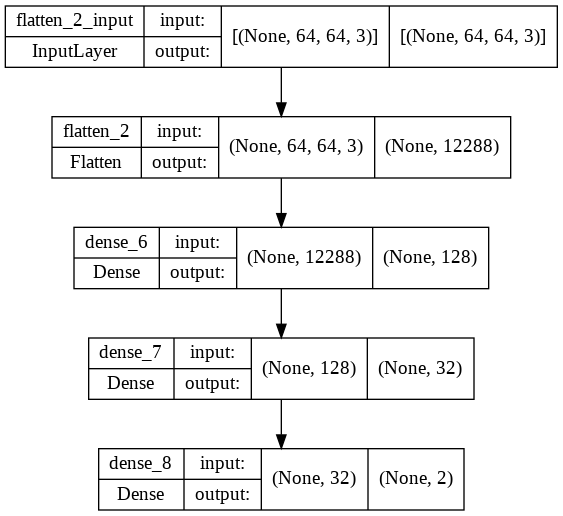

In [ ]:
plot_model(modela, 
           show_shapes = True, 
           show_layer_names = True)

### **Compile, fit and run the model**

In [ ]:
# Compile the model 

sgd = optimizers.SGD(learning_rate= 1e-5)
modela.compile(optimizer = 'sgd', 
               loss = 'binary_crossentropy', 
               metrics = (['accuracy']))

In [ ]:
# Fit and run the model for 30 epochs

historya = modela.fit(train_images, 
                      train_labels,
                      epochs = 30,
                      validation_split = 0.1,
                      verbose = 1)

Epoch 1/30
702/702 [==============================] - 3s 3ms/step - loss: 0.6624 - accuracy: 0.6024 - val_loss: 0.6903 - val_accuracy: 0.5393
Epoch 2/30
702/702 [==============================] - 2s 3ms/step - loss: 0.6324 - accuracy: 0.6425 - val_loss: 0.6959 - val_accuracy: 0.5665
Epoch 3/30
702/702 [==============================] - 2s 3ms/step - loss: 0.6166 - accuracy: 0.6605 - val_loss: 0.5552 - val_accuracy: 0.7256
Epoch 4/30
702/702 [==============================] - 2s 3ms/step - loss: 0.6045 - accuracy: 0.6766 - val_loss: 0.4091 - val_accuracy: 0.8690
Epoch 5/30
702/702 [==============================] - 2s 3ms/step - loss: 0.5987 - accuracy: 0.6783 - val_loss: 0.5719 - val_accuracy: 0.6927
Epoch 6/30
702/702 [==============================] - 2s 3ms/step - loss: 0.5953 - accuracy: 0.6841 - val_loss: 0.7227 - val_accuracy: 0.5385
Epoch 7/30
702/702 [==============================] - 2s 3ms/step - loss: 0.5902 - accuracy: 0.6842 - val_loss: 0.8783 - val_accuracy: 0.3750
Epoch 

### **Measure the performances**

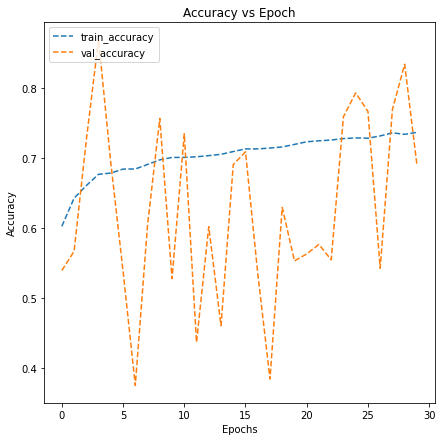

In [ ]:
# Plot the accuracies

def plot_accuracy(historya):
    N = len(historya.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), historya.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), historya.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")
    plt.show()
    
plot_accuracy(historya)

In [ ]:
# get testing accuracy

accuracy = modela.evaluate(test_images, 
                           test_labels, 
                           verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6415

 Test_Accuracy:- 0.6415384411811829


              precision    recall  f1-score   support

           0       0.63      0.70      0.66      1300
           1       0.66      0.58      0.62      1300

    accuracy                           0.64      2600
   macro avg       0.64      0.64      0.64      2600
weighted avg       0.64      0.64      0.64      2600



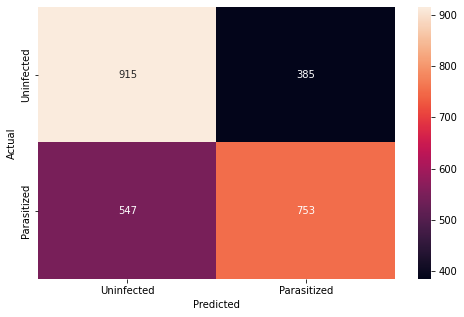

In [ ]:
preda = modela.predict(test_images)
preda = np.argmax(preda, axis = 1) 
y_truea = np.argmax(test_labels, axis = 1)

# Print the classification report
print(classification_report(y_truea, preda))

# Plot the heatmap using confusion matrix
cma = confusion_matrix(y_truea, preda)
plt.figure(figsize=(8,5))
sns.heatmap(cma, 
            annot=True,  
            fmt='.0f', 
            xticklabels=['Uninfected', 'Parasitized'], 
            yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Build CNN Model**


## **Base Model**

#### **Clear backend and set up random seed**

In [ ]:
# Clear backend

backend.clear_session()

# Fix the seed for random number generators 
# Ensure we receive the same output everytime

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

####<b> Build the model

In [ ]:
# Create sequential model

model = Sequential()
model.add(Conv2D(filters= 32, kernel_size= 5, padding = "same", activation = "relu", input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters= 32, kernel_size= 5, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters= 32, kernel_size= 5, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))

# We fintune the output layer neuron 64, 128, 256, 512, 1024 and 2048
# Neuron 128, 256, 512, 1024 have very similar performance
# Neuron 1024 is slightly better as the best
# Neuron 64 is ok, but slightly worse than the previous 4 values
# Neuron 2048 is ok, but slightly worse than the previous 4 values as well
# We will use 1024 as the final 

# Fine-tune final dropout layer's percentage 0, 0.4 and 0.8
# Both 0 and 0.8 does not perform better than 0.4
# We will use 0.4 -  appropriate regularization at the end is optimal

# Fine-tune Conv2D layer's filter 16, 32 and 64
# filter 16 and 64 won't perform better than 32
# We even try 16, 32, 64 or 4, 16, 32 in sequence for the 3 layers, not better
# We will use 32/32/32 since it's the optimal

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

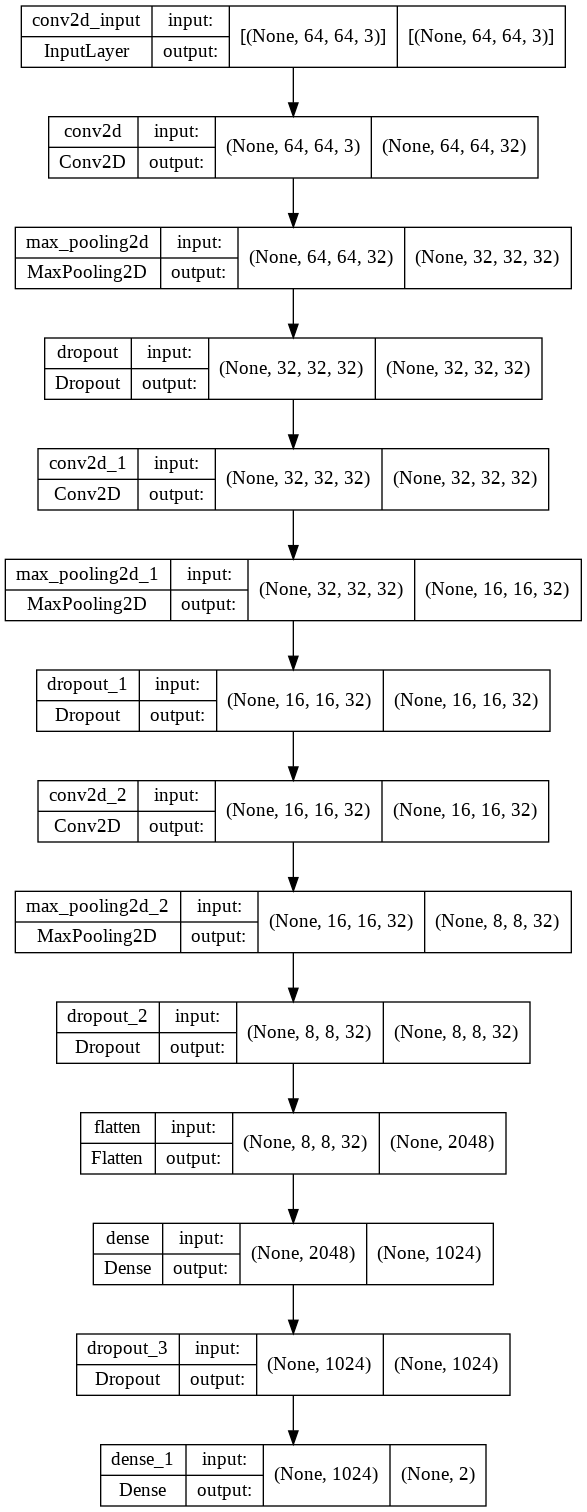

In [ ]:
plot_model(model, 
           show_shapes = True, 
           show_layer_names = True)

####<b> Compile the model

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

# Fine-tune Adam and SGD
# Adam converges very fast and performance better to 98-99 recall and 97-98 f1/test accuracy
# SGD generalizes up but eventually reaches maximum 93 recall and 93 f1/test accuracy
# We chose Adam afterwards

<b> Use Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', 
                           patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', 
                             monitor ='val_loss', 
                             save_best_only = True)]

# EarlyStopping: A class to stop training if a monitored metric is not improving
# patience: Number of epochs with no improvement after which training will be stopped
# patience: Higher patience could help to avoid stuck in the local minimum, but longer run time

# ModelCheckpoint: In callback to save the model's weights
# mdl_wts.hdf5: The file to save model weights (wts)
# hdf5 is "Hierarchical Data Format version 5"
# hdf5 is an open source file format that supports large, complex, heterogeneous data
# hdf5 uses a "file directory" to organize data within the file in many different structured ways
# save_best_only = True means saving the latest best model according to the metrics monitored

### **Fit and train our Model**

In [ ]:
# Fit the model with min batch size as 32
# Batch size has to be factor of 2^power (8, 16, 32, 64, 128) to fit computer's memory

history = model.fit(train_images,
                    train_labels,
                    batch_size = 32,
                    callbacks = callbacks,
                    validation_split = 0.2,
                    epochs = 20,
                    verbose = 1)

# Fine-tune batch size 32, 64
# batch size 32 seems the best, but not too much difference

# Fine-tune validation split 0.1, 0.2 and 0.3
# validation split 0.1 or 0.3 does not change anything from 0.2
# Will keep 0.2

Epoch 1/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0470 - accuracy: 0.9824 - val_loss: 0.0654 - val_accuracy: 0.9848
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0488 - accuracy: 0.9826 - val_loss: 0.1018 - val_accuracy: 0.9760
Epoch 3/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0477 - accuracy: 0.9822 - val_loss: 0.0708 - val_accuracy: 0.9838
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0454 - accuracy: 0.9823 - val_loss: 0.0605 - val_accuracy: 0.9876
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0455 - accuracy: 0.9845 - val_loss: 0.0589 - val_accuracy: 0.9868
Epoch 6/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0456 - accuracy: 0.9830 - val_loss: 0.0667 - val_accuracy: 0.9858
Epoch 7/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0434 - accuracy: 0.9845 - val_loss: 0.0887 - val_accuracy: 0.9850
Epoch 

### **Evaluate the model on test data**

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose=0)
print('\n', 'Test_Accuracy:-', accuracy[1])


 Test_Accuracy:- 0.9861538410186768


### **Plot the train and validation curves**

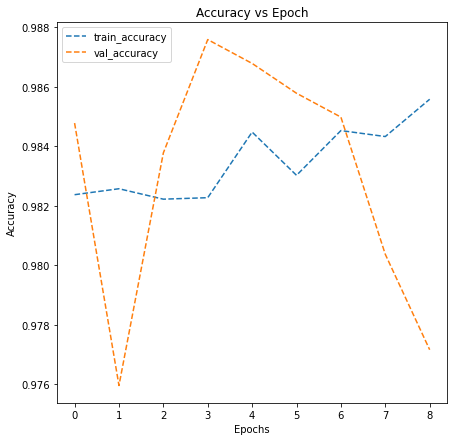

In [ ]:
# Set up function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), 
             history.history["accuracy"], 
             label="train_accuracy", 
             ls='--')
    plt.plot(np.arange(0, N), 
             history.history["val_accuracy"], 
             label="val_accuracy", 
             ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

plot_accuracy(history)

### **Plot the confusion matrix with classification report**

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1300
           1       0.98      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



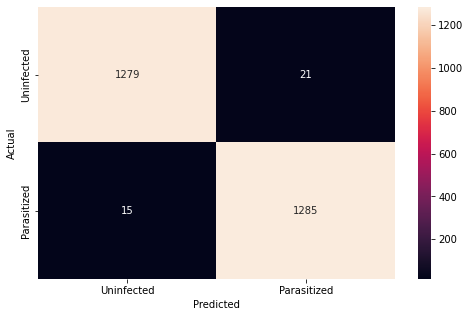

In [ ]:
# np.argmax returns the indices of the maximum values along an axis.

pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Print the classification report
print(classification_report(y_true, pred))

# Plot the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, 
            annot=True,  
            fmt='.0f', 
            xticklabels=['Uninfected', 'Parasitized'], 
            yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Observations and Insights**

* **Base Model** - Reaches successfully Recall, f1-Score and Test Accuracy 99%, 99% and 99%

## **Model 1**
### **Improve the performance of our model by adding new layers**


In [ ]:
# Clear backend
backend.clear_session()

# Fix the seed for random number generators so that 
# Ensure we receive the same output everytime

np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Build the Model

In [ ]:
# Create sequential model

model1=Sequential()

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64,64,3)))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))
model1.add(Dropout(0.4))
model1.add(Dense(2, activation = "softmax")) 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

### **Plot the model**

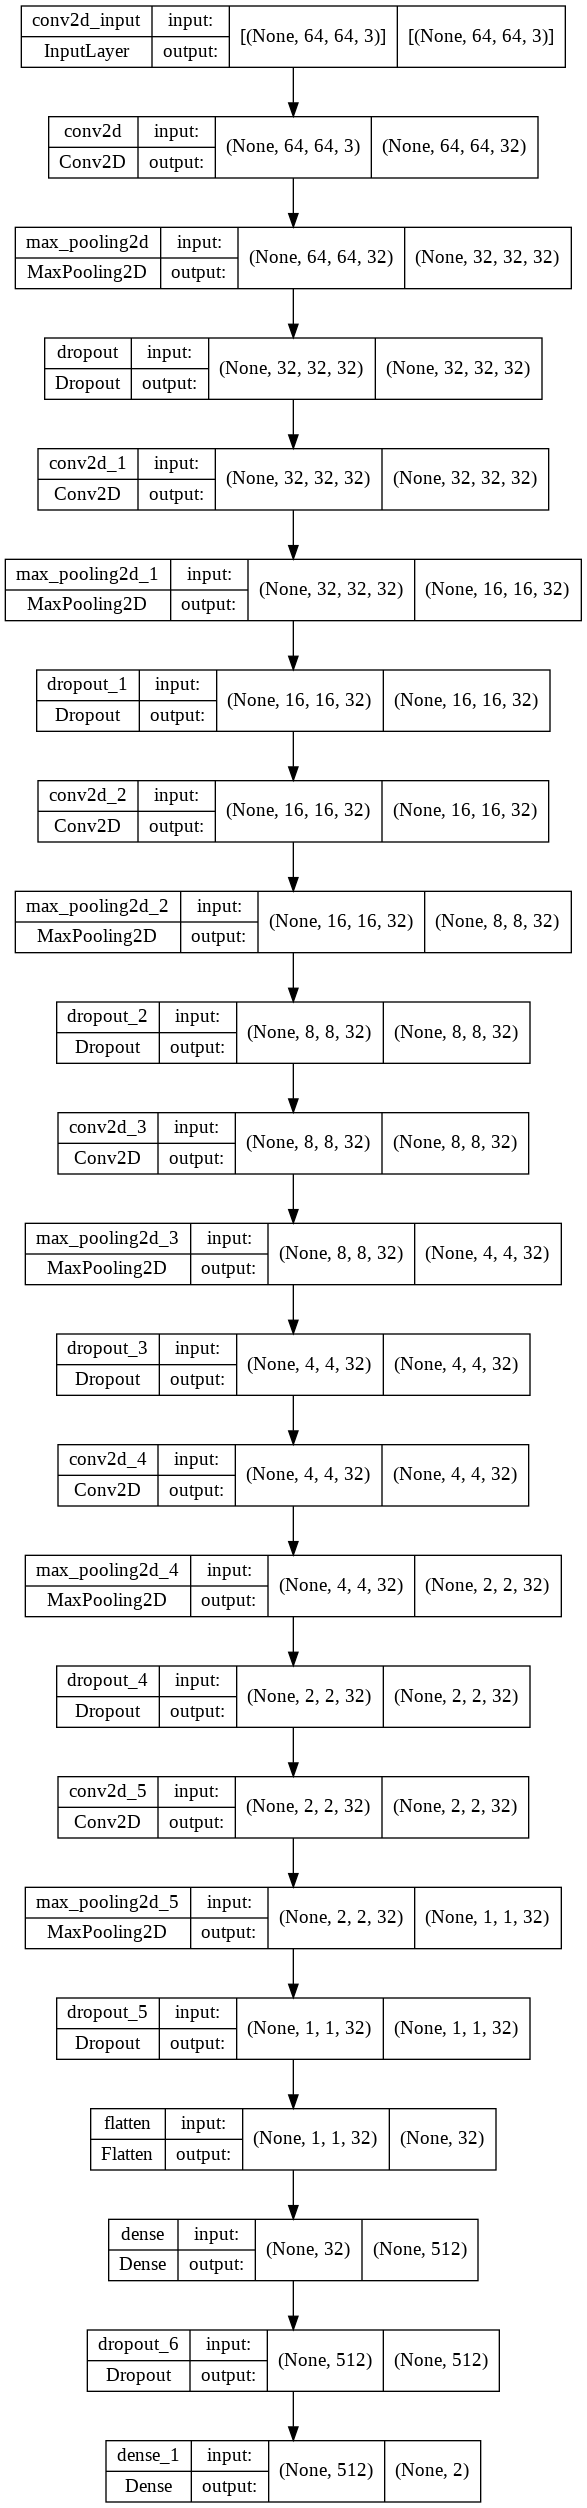

In [ ]:
plot_model(model1, 
           show_shapes = True, 
           show_layer_names = True)

### **Compile the model**

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### **Use Callbacks**

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', 
                           patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', 
                             monitor = 'val_loss', 
                             save_best_only = True)]

### **Fit and Train the model**

In [ ]:
history1=model1.fit(train_images,
                    train_labels,
                    batch_size = 32,
                    callbacks = callbacks,
                    validation_split = 0.2,
                    epochs = 20,
                    verbose = 1)

Epoch 1/20
624/624 [==============================] - 5s 7ms/step - loss: 0.3367 - accuracy: 0.8422 - val_loss: 0.1073 - val_accuracy: 0.9714
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1071 - accuracy: 0.9654 - val_loss: 0.0799 - val_accuracy: 0.9762
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0863 - accuracy: 0.9714 - val_loss: 0.0998 - val_accuracy: 0.9671
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0808 - accuracy: 0.9739 - val_loss: 0.0565 - val_accuracy: 0.9798
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0784 - accuracy: 0.9737 - val_loss: 0.0989 - val_accuracy: 0.9694
Epoch 6/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0745 - accuracy: 0.9739 - val_loss: 0.0563 - val_accuracy: 0.9764
Epoch 7/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0739 - accuracy: 0.9760 - val_loss: 0.0796 - val_accuracy: 0.9706
Epoch 

####<b> Evaluate the model

In [ ]:
accuracy = model1.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9819

 Test_Accuracy:- 0.9819231033325195


###  **Plot the confusion matrix**

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



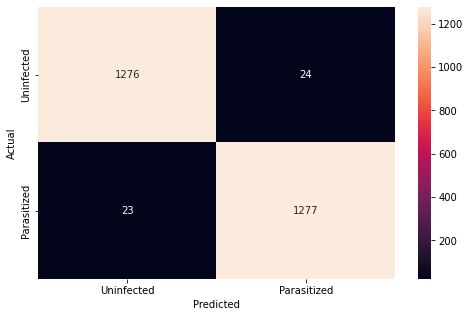

In [ ]:
pred1 = model1.predict(test_images)
pred1 = np.argmax(pred1,axis = 1) 
y_true1 = np.argmax(test_labels,axis = 1)

# Print the classification report
print(classification_report(y_true1, pred1))

# Plot the heatmap using confusion matrix
cm1 = confusion_matrix(y_true1, pred1)
plt.figure(figsize = (8,5))
sns.heatmap(cm1, 
            annot = True,  
            fmt = '.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Plot the Train and validation curves**

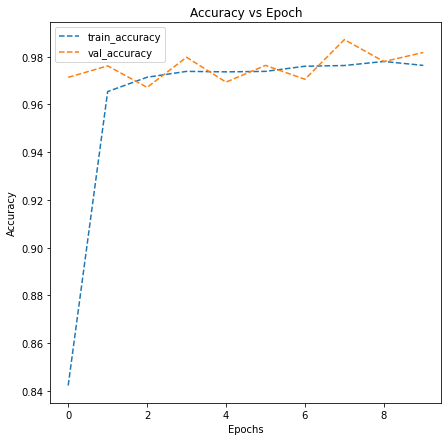

In [ ]:
# Set function to plot train and validation accuracy 

def plot_accuracy(history):
    N = len(history1.history["accuracy"])
    plt.figure(figsize = (7,7))
    plt.plot(np.arange(0, N), 
             history1.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history1.history["val_accuracy"], 
             label = "val_accuracy", 
             ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

plot_accuracy(history)

## **Model 2: Finetuning with LeakyReLU and Batch Normalization**

In [ ]:
# Clear backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Build the Model**

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), input_shape=(64, 64, 3), padding='same', activation="LeakyReLU"))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="LeakyReLU"))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="LeakyReLU"))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(256,activation="LeakyReLU"))
model2.add(Dropout(0.2))
model2.add(Dense(2,activation="softmax"))

# Complete this model using BatchNormalization layers and by using LeakyRelu as the activation function

adam = optimizers.Adam(learning_rate=1e-3)
model2.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

### **Plot the model**

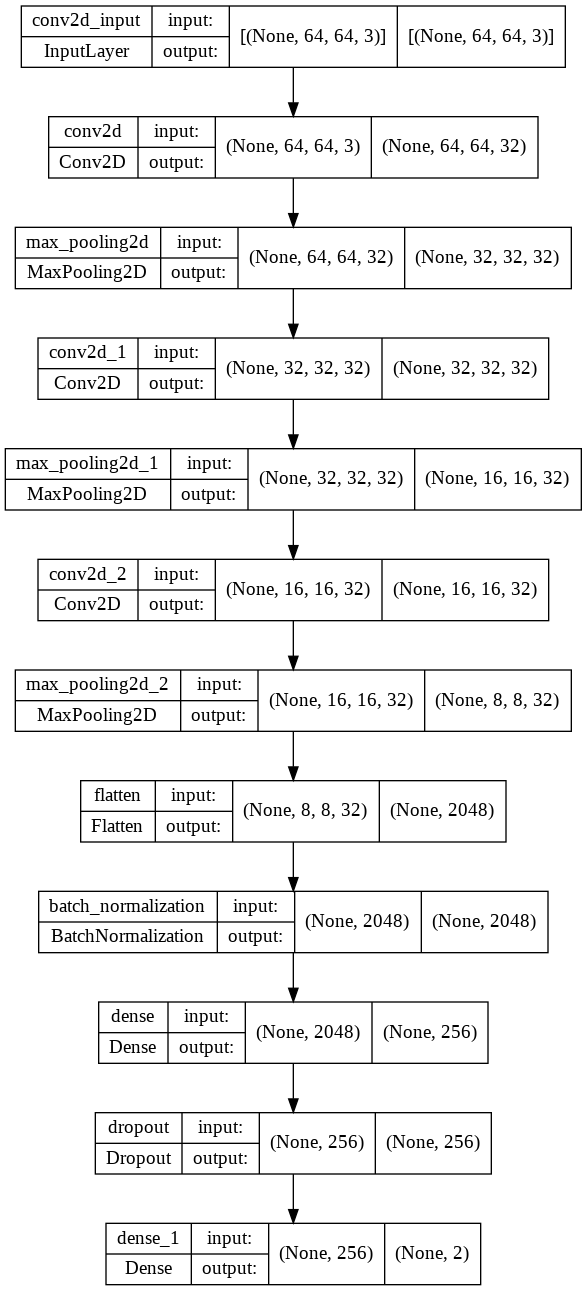

In [ ]:
plot_model(model2, 
           show_shapes = True, 
           show_layer_names = True)

#### **Compile the model**

In [ ]:
model2.compile(loss = "binary_crossentropy", 
               optimizer= 'adam', 
               metrics = ['accuracy'])

### **Use callbacks**

In [ ]:
# Create the callbacks similarly as done in the base model
# As callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve

callbacks = [EarlyStopping(monitor = 'val_loss', 
                           patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', 
                             monitor = 'val_loss', 
                             save_best_only = True)]

### **Fit and train the model**

In [ ]:
history2 = model2.fit(train_images,
                      train_labels,
                      batch_size =32,
                      callbacks = callbacks,
                      validation_split = 0.2,
                      epochs = 20,
                      verbose = 1)

Epoch 1/20
624/624 [==============================] - 4s 6ms/step - loss: 0.2332 - accuracy: 0.9055 - val_loss: 0.1000 - val_accuracy: 0.9794
Epoch 2/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1078 - accuracy: 0.9629 - val_loss: 0.0365 - val_accuracy: 0.9932
Epoch 3/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0960 - accuracy: 0.9676 - val_loss: 0.1008 - val_accuracy: 0.9780
Epoch 4/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0913 - accuracy: 0.9681 - val_loss: 0.0455 - val_accuracy: 0.9948


### **Plot the train and validation accuracy**

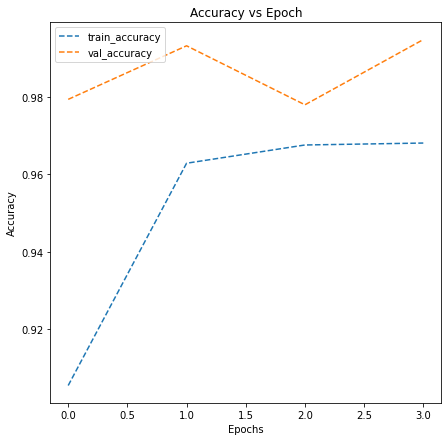

In [ ]:
# Plot the accuracies

def plot_accuracy(history):
    N = len(history2.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), 
             history2.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history2.history["val_accuracy"], 
             label = "val_accuracy", 
             ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

plot_accuracy(history)

### **Evaluate the model**

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy = model2.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9742

 Test_Accuracy:- 0.9742307662963867


### **Generate the classification report and confusion matrix** 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1300
           1       0.99      0.95      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.98      0.97      0.97      2600
weighted avg       0.98      0.97      0.97      2600



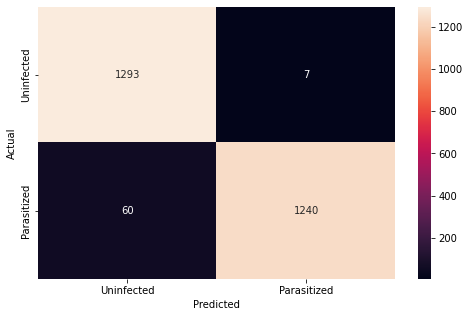

In [ ]:
pred2 = model2.predict(test_images)
pred2 = np.argmax(pred2,axis = 1) 
y_true2 = np.argmax(test_labels,axis = 1)

# Print the classification report
print(classification_report(y_true2,pred2))

# Plot the heatmap using confusion matrix
cm2 = confusion_matrix(y_true2,pred2)
plt.figure(figsize=(8,5))
sns.heatmap(cm2, 
            annot = True,  
            fmt ='.0f',  
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


* References to image data augmentation below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





### **Observations and insights:** 

* **Why not using BN in the convolutional layer?** 
 * **1. It is an expensive process**
Since the test data can be from different distributions, and to keep the network prediction consistent with the training phase, we cannot use the mean and variance calculated from the test batch. So when the network is in the training phase, we store the mean and variance value calculated by each node on each mini-batch. Then use an exponential weighted average across all mini-batches for both mean and variance. We use those values which were calculated during training time as the test mean and variance. And of course, there are two extra parameters to learn which are gamma and beta.
 * **2. Does not train data independently**
Batch norm consisting of a high batch size will be a much better approximation of the actual training data rather than batch norm with a small batch size. In case your batch size is really low (e.g. 2-5), the mean is going to be a very noisy approximation. Because of this dependence on batch size, it’s really hard to replicate the model performance on a setting with very limited hardware resources.
Therefore, in my opinion, using BN in dense layers is a better idea since at that stage the feature extraction is completed from images.

* **What we did so far in Milestone 2 with CNN**
 * **1) Model: Base Model** - 13 layers (Conv2D, MaxPooling2D, Dropout, Flatten, Dense). In the base model, we use the most basic skill to start from Convolution 2D layer, then use the MaxPooling 2D layer to downsample. The Dropout layer is to prevent outfitting. The test accuracy has been 99%. The recall is 99% which is very impressive.
 * **2) Model 1: Base Model + deeper layers** -  22 layers (Conv2D, MaxPooling2D, Dropout, Flatten, Dense). We simply base on exactly the same structure to add more layers to make it deeper to experiment if the result could be even better. The test accuracy is 98%. The recall is 98%, which is no improvement from the base model.
 * **3) Model 2: Batch Nomalization** - 11 layers (Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense). The purpose of this model 2 is to try Batch Normlization which aims for regulization of the model and reduce the need of dropout layers. The test accuracy is 97%. The recall is 95% which is amazing. Comparing all three models, we won't say which one is the best depending on business considerations. The time/cost could be another angle to judge the effectiveness or the best solution design.




## **Model 3 with Data Augmentation**

In [ ]:
# Clear backend
from tensorflow.keras import backend
backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

#### **Use image data generator**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, 
                                                  train_labels, 
                                                  test_size = 0.2, 
                                                  random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use ImageDataGenerator to generate images

train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, 
                                  rotation_range = 30)
val_datagen  = ImageDataGenerator()

# Flow training images with train_datagen generator
train_generator = train_datagen.flow(x = train_images, 
                                     y = train_labels, 
                                     batch_size = 64, 
                                     seed = 42, 
                                     shuffle = True)     

# Flow validation images with val_datagen generator
val_generator = val_datagen.flow(x = test_images, 
                                  y = test_labels, 
                                  batch_size = 64, 
                                  seed = 42, 
                                  shuffle = True)

### **Visualize augmented images**

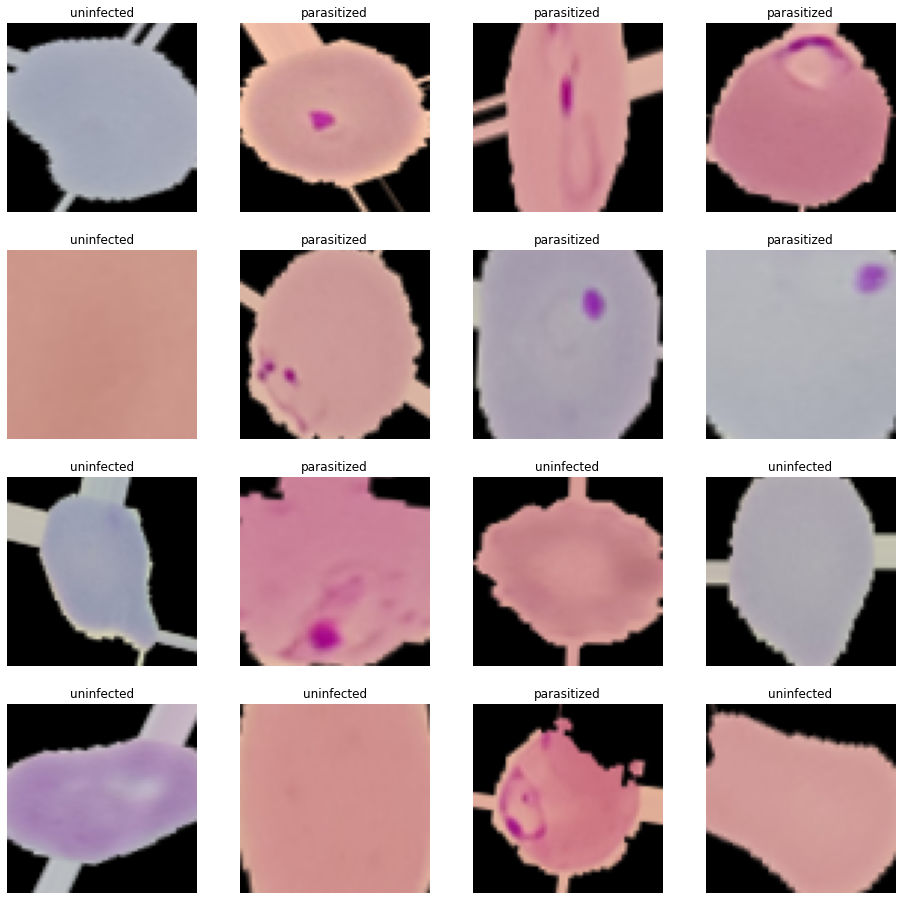

In [ ]:
# Creat an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plot 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

### **Observations and insights**:
* **What image data generator can do?** - 
 * **1) Image shifts** - via the width_shift_range and height_shift_range arguments
 * **2) Image flips** -  via the horizontal_flip and vertical_flip arguments
 * **3) Image rotations** -  via the rotation_range argument
 * **4) Image brightness** -  via the brightness_range argument
 * **5) Image zoom** -  via the zoom_range argument
* **What we did with the image data generator** - 
 * **1) horizontal_flip** - We set it True, which means we will randomly flip inputs horizontally to train the model to learn from the parasitized images and uninfected umages as well
 * **2) zoom_range** - We set it to 0.5, which is more than normal 0.2 setting. The more zoom range, the more floating and the more range for random zoom. It refers we push the model learn higher tolerance even it's floating or zooming in or out
 * **3) rotation_range** - We set it 30 degree. According to what we learned in MIT classes, the chart shows 90, 180 or 270 are easy to learn or judge/guess it right. So the 30 is not an easy one. We push harder for model to learn even it's with some rotation. We did expect this model to learn more
 * **4) width_shift_range and height_shift_range** - We tried both 1 and 0.2, very very bad result. We believe it's not suitable for this dataset since the shift in both sides does not help to learn more since the stain does not has this feature to learn.
* **Visualization** - From naked eyes, we can tell there are more variety with the rotation and the fliop even zoom
* **Expectation** - With the data augmentation, we expect to see some improvement from the performance if we train model to be smarter

#### **Build the Model**

In [ ]:
backend.clear_session()

# Fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model3 = Sequential()
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape=(64,64,3)))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))
model3.add(Dropout(0.4))
model3.add(Dense(2, activation = "softmax")) 

adam = optimizers.Adam(learning_rate = 1e-3)
model3.compile(loss = "binary_crossentropy", 
               optimizer = 'adam' , 
               metrics = ['accuracy'])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0

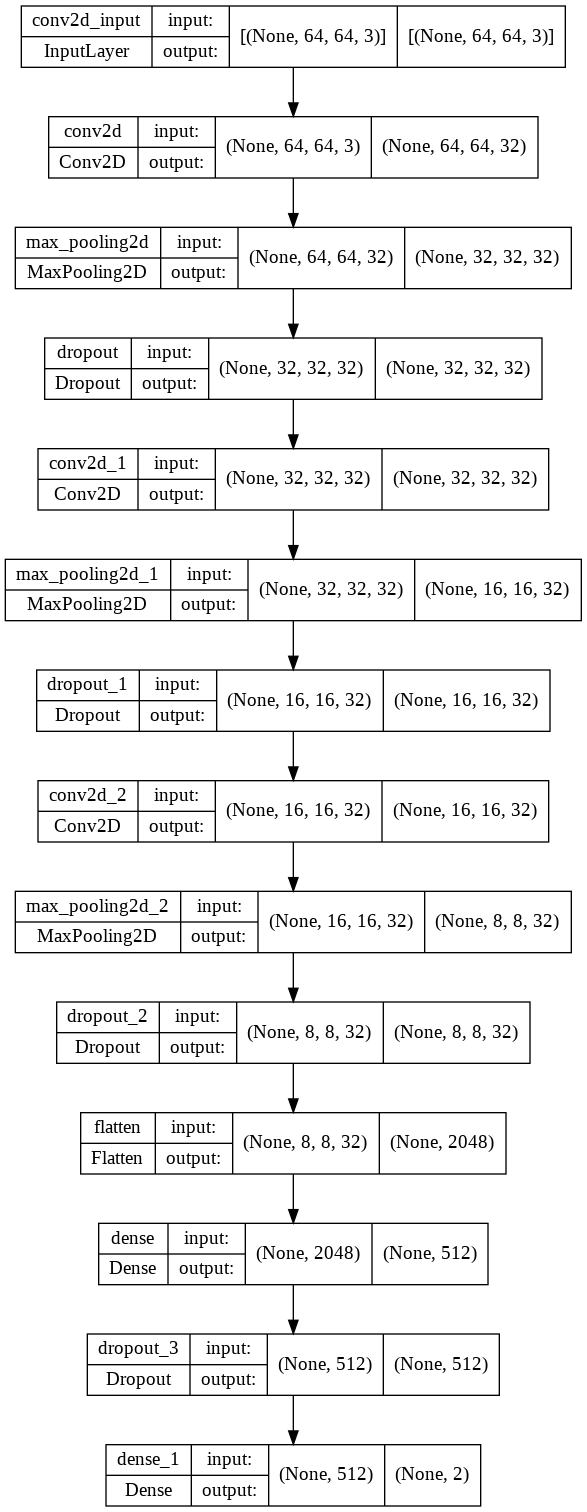

In [ ]:
plot_model(model3, 
           show_shapes = True, 
           show_layer_names = True)

### **Fit and Train the model**

In [ ]:
history3 = model3.fit(train_generator, 
                      validation_data = val_generator,
                      batch_size = 32,
                      callbacks = callbacks,
                      epochs = 10,
                      verbose = 1)

Epoch 1/10
390/390 [==============================] - 24s 59ms/step - loss: 0.5505 - accuracy: 0.7081 - val_loss: 0.2052 - val_accuracy: 0.9319
Epoch 2/10
390/390 [==============================] - 24s 61ms/step - loss: 0.2202 - accuracy: 0.9139 - val_loss: 0.1936 - val_accuracy: 0.9185
Epoch 3/10
390/390 [==============================] - 24s 60ms/step - loss: 0.1940 - accuracy: 0.9288 - val_loss: 0.1384 - val_accuracy: 0.9623
Epoch 4/10
390/390 [==============================] - 23s 59ms/step - loss: 0.1760 - accuracy: 0.9394 - val_loss: 0.1108 - val_accuracy: 0.9665
Epoch 5/10
390/390 [==============================] - 23s 59ms/step - loss: 0.1658 - accuracy: 0.9429 - val_loss: 0.1071 - val_accuracy: 0.9573
Epoch 6/10
390/390 [==============================] - 23s 59ms/step - loss: 0.1577 - accuracy: 0.9445 - val_loss: 0.1049 - val_accuracy: 0.9615
Epoch 7/10
390/390 [==============================] - 23s 59ms/step - loss: 0.1503 - accuracy: 0.9486 - val_loss: 0.0754 - val_accuracy:

#### **Evaluate the model**

In [ ]:
accuracy = model3.evaluate(test_images, 
                           test_labels, 
                           verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9796

 Test_Accuracy:- 0.9796153903007507


### **Plot the train and validation accuracy**

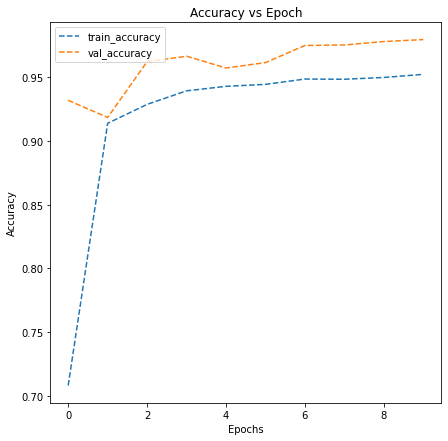

In [ ]:
# Plot the accuracies

def plot_accuracy(history):
    N = len(history3.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), 
             history3.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history3.history["val_accuracy"], 
             label = "val_accuracy", 
             ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

plot_accuracy(history)

### **Plot the classification report and confusion matrix**

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



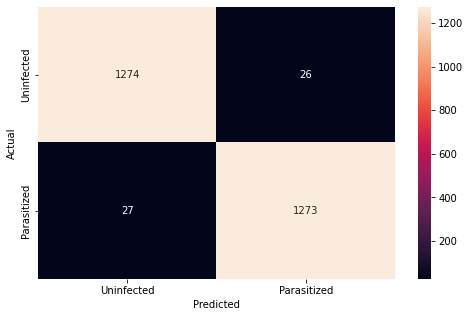

In [ ]:
pred3 = model3.predict(test_images)
pred3 = np.argmax(pred3,axis = 1) 
y_true3 = np.argmax(test_labels,axis = 1)

# Print the classification report
print(classification_report(y_true3, pred3))

# Plot the heatmap using confusion matrix
cm3 = confusion_matrix(y_true3, pred3)
plt.figure(figsize = (8,5))
sns.heatmap(cm3, 
            annot = True,  
            fmt ='.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Model 4 - VGG 16 (Pre-trained Model)**

* **Benefit of Transfer Learning**
Less epochs needed. Which means less time and efforts to complete a task.

* **TensorFlow Hub**
There's a hub to store all kinds of pre-trained models called "TensorFlow Hub" https://www.tensorflow.org/hub

In [ ]:
# Clear backend
backend.clear_session()

# Fix the seed for random number generators

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

## VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. 
## It is considered to be one of the excellent vision model architecture till date.
## include_top = True => To include the 3 fully-connected layers at the top of the network
## weights = 'imagenet' =>  will do pre-training on ImageNet
## input_shape = optional shape tuple, only to be specified if include_top is False 
## (otherwise the input shape has to be (224, 224, 3)
## (with channels_last data format) or (3, 224, 224) (with channels_first data format). 
## It should have exactly 3 input channels, and width and height should be no smaller than 32.

vgg = VGG16(include_top = False, 
            weights = 'imagenet', 
            input_shape = (64,64,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     



A last, optional step, is fine-tuning, which consists of unfreezing the entire model you obtained
above (or part of it), and re-training it on the new data with a very low learning rate. This can
potentially achieve meaningful improvements, by incrementally adapting the pretrained
features to the new data.

In [ ]:
## Retrieve a layer based on either its name (unique) or index

transfer_layer = vgg.get_layer('block5_pool')

## Freeze the vgg layers
## Set vgg.trainable to False moves all the layer's weights from trainable to non-trainable

vgg.trainable = False

In [ ]:
# Add classification layers on top of it   
x = Flatten()(transfer_layer.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)
model4 = Model(vgg.input, pred) 

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

### **Plot the model**

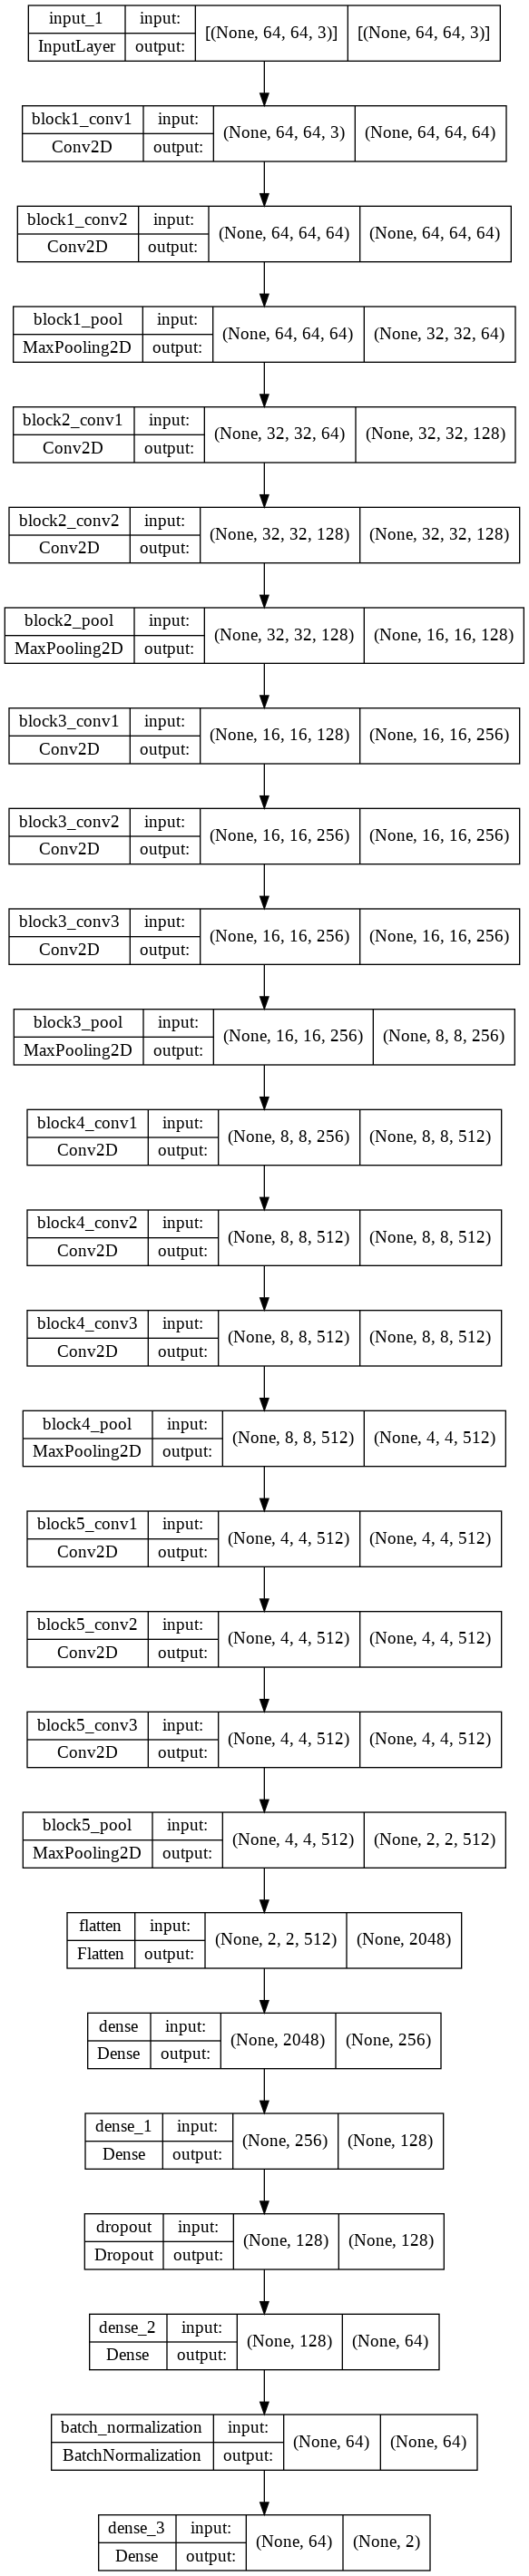

In [ ]:
plot_model(model4, 
           show_shapes = True, 
           show_layer_names = True)

####<b>Compile the model

In [ ]:
adam = optimizers.Adam(learning_rate=1e-5)
model4.compile(optimizer = 'adam', 
               loss = 'binary_crossentropy', 
               metrics = (['accuracy']))

### **Fit and Train the model**

In [ ]:
# Fit and run the model for 10 epochs
history4 = model4.fit(
            train_images, 
            train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1)

Epoch 1/10
624/624 [==============================] - 10s 15ms/step - loss: 0.2349 - accuracy: 0.9067 - val_loss: 0.4067 - val_accuracy: 0.8209
Epoch 2/10
624/624 [==============================] - 9s 14ms/step - loss: 0.1734 - accuracy: 0.9333 - val_loss: 0.4378 - val_accuracy: 0.7963
Epoch 3/10
624/624 [==============================] - 9s 14ms/step - loss: 0.1557 - accuracy: 0.9421 - val_loss: 0.0897 - val_accuracy: 0.9758
Epoch 4/10
624/624 [==============================] - 9s 14ms/step - loss: 0.1531 - accuracy: 0.9422 - val_loss: 0.0990 - val_accuracy: 0.9712
Epoch 5/10
624/624 [==============================] - 9s 14ms/step - loss: 0.1388 - accuracy: 0.9487 - val_loss: 0.1329 - val_accuracy: 0.9589
Epoch 6/10
624/624 [==============================] - 9s 14ms/step - loss: 0.1419 - accuracy: 0.9467 - val_loss: 0.1900 - val_accuracy: 0.9233
Epoch 7/10
624/624 [==============================] - 9s 14ms/step - loss: 0.1336 - accuracy: 0.9492 - val_loss: 0.1212 - val_accuracy: 0.967

### **Plot the train and validation accuracy**

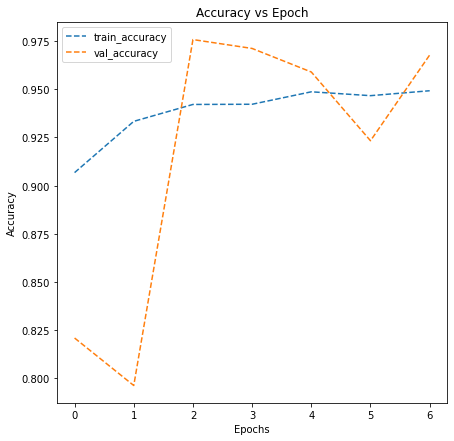

In [ ]:
# Plot the accuracies

def plot_accuracy(history):
    N = len(history4.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), 
             history4.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history4.history["val_accuracy"], 
             label = "val_accuracy", 
             ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")
    plt.show()

plot_accuracy(history)

### **Observations and insights:**
* **Focus in the dense layer structure** - We've been getting the pre-trained from convolution layer. We focus on the structure and tuning of the dense layers.


### **Evaluate the model**

In [ ]:
# Evaluate the model on test data
accuracy = model4.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 11ms/step - loss: 0.1372 - accuracy: 0.9496

 Test_Accuracy:- 0.9496153593063354


### **Plot the classification report and confusion matrix**

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1300
           1       0.95      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



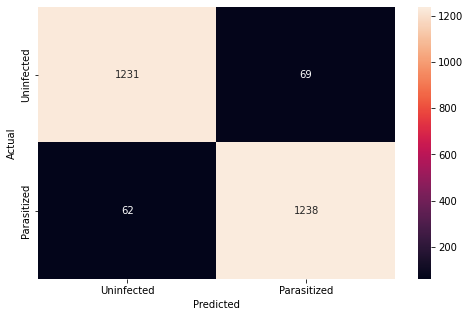

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

pred4 = model4.predict(test_images)
pred4 = np.argmax(pred4, axis = 1) 
y_true4 = np.argmax(test_labels, axis = 1)

# Print the classification report
print(classification_report(y_true4, pred4))

# Plot the heatmap using confusion matrix
cm4 = confusion_matrix(y_true4,pred4)
plt.figure(figsize = (8,5))
sns.heatmap(cm4, 
            annot = True,  
            fmt = '.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Observations and Conclusions**
* **1. VGG16 pre-train model works** -
 * **1) VGG16 deals with image classification successfully** - VGG16 is a convolutional neural network trained on a subset of the ImageNet dataset, a collection of over 14 million images belonging to 22,000 categories in 2015
paper. It's a very deep convolutional network for large-Scale image recognition. We transfer Task A (VGG16) to learn in Task B (Malaria Detection)
 * **2) What makes VGG16 unique?** - Instead of having a large number of hyper-parameters VGG16 focuses on having convolution layers of 3x3 filter with a stride 1 and always used the same padding and maxpool layer of 2x2 filter of stride 
 * **4) Same input** - Digital color images are the same or similar inputs
 * **5) VGG16 has a lot more data than the Malaria Detection dataset** - The VGG16 trained with over 14M images while our the Malaria Detection dataset has less than 30K
 * **6) We could leverage low-level features from VGG16** - We believe the learning of low-level features from VGG16 could be helpful to learn in the Malaria detection
* **2. What we did so far** - 
 * **1) Take layers from VGG16** 
 * **2) Freeze the layers** - so as to avoid destroying any of the information they contain during future training rounds
 * **3) Add new, trainable layers on top of the frozen layers** -  They will learn to turn the old features into predictions on our new dataset
 * **4) Train the new layers on our dataset**
* **3. Result - Can't beat our previous models** - The overall test accuracy is 95%. Recall on parasitized class is 95%.



**Improvements that can be done:**<br>
* **Yes, in the final report, we should have some room to try other pre-trained models and different CNN architecdtures since we've been doing trial with various approaches. It's worthy to give it a try**

## **Model 4 Aug. - VGG 16 + Data Augmentation (Pre-trained Model)**

In [ ]:
# Clear backend
backend.clear_session()

# Fix the seed for random number generators

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg_aug = VGG16(include_top = False, 
            weights = 'imagenet', 
            input_shape = (64,64,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_aug.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
## Retrieve a layer based on either its name (unique) or index

transfer_layer = vgg_aug.get_layer('block5_pool')

## Freeze the vgg layers
## Set vgg_aug.trainable to False moves all the layer's weights from trainable to non-trainable

vgg_aug.trainable = False

In [ ]:
x = Flatten()(transfer_layer.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

pred_aug = Dense(2, activation='softmax')(x)


In [ ]:
model4_aug = Model(vgg_aug.input, pred_aug) 

In [ ]:
plot_model(model4_aug, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
adam = optimizers.Adam(learning_rate=1e-5)
model4_aug.compile(optimizer = 'adam', 
               loss = 'binary_crossentropy', 
               metrics = (['accuracy']))

In [ ]:
# Add Callbacks to the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor ='val_loss', 
                           patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', 
                             monitor = 'val_loss', 
                             save_best_only = True)]

In [ ]:
# Fit and run the model for 10 epochs
history4_aug = model4_aug.fit(train_generator, 
                      validation_data = val_generator,
                      epochs = 10,
                      callbacks = callbacks,
                      batch_size = 32,
                      verbose = 1)

Epoch 1/10
390/390 [==============================] - 27s 66ms/step - loss: 0.4053 - accuracy: 0.8193 - val_loss: 0.4928 - val_accuracy: 0.7554
Epoch 2/10
390/390 [==============================] - 26s 66ms/step - loss: 0.3443 - accuracy: 0.8527 - val_loss: 0.1908 - val_accuracy: 0.9246
Epoch 3/10
390/390 [==============================] - 25s 65ms/step - loss: 0.3301 - accuracy: 0.8595 - val_loss: 1.0868 - val_accuracy: 0.5900
Epoch 4/10
390/390 [==============================] - 25s 65ms/step - loss: 0.3213 - accuracy: 0.8645 - val_loss: 0.2242 - val_accuracy: 0.9038
Epoch 5/10
390/390 [==============================] - 26s 65ms/step - loss: 0.3202 - accuracy: 0.8637 - val_loss: 0.2620 - val_accuracy: 0.8927
Epoch 6/10
390/390 [==============================] - 25s 65ms/step - loss: 0.3169 - accuracy: 0.8665 - val_loss: 0.2908 - val_accuracy: 0.8658


In [ ]:
# Evaluate the model on test data
accuracy = model4_aug.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 11ms/step - loss: 0.2908 - accuracy: 0.8658

 Test_Accuracy:- 0.8657692074775696


              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1300
           1       0.80      0.98      0.88      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.86      2600
weighted avg       0.89      0.87      0.86      2600



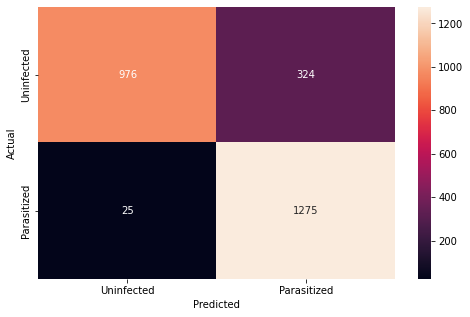

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

pred4_aug = model4_aug.predict(test_images)
pred4_aug = np.argmax(pred4_aug, axis = 1) 
y_true4_aug = np.argmax(test_labels, axis = 1)

# Print the classification report
print(classification_report(y_true4_aug, pred4_aug))

# Plot the heatmap using confusion matrix
cm4_aug = confusion_matrix(y_true4_aug, pred4_aug)
plt.figure(figsize = (8,5))
sns.heatmap(cm4_aug, 
            annot = True,  
            fmt = '.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Model 4a - VGG 19 (Pre-trained Model)**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Model

## VGG19 is the 19-layer updated version of convolution neural net (CNN ) architecture from VGG16, which won ILSVR(Imagenet) competition in 2014. 


vgg2 = VGG19(include_top = False, 
             weights = 'imagenet', 
             input_shape = (64,64,3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg2.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Retrieve a layer based on either its name (unique) or index
transfer_layer2 = vgg2.get_layer('block5_pool')

# Freeze the vgg2 layers
# Set vgg2.trainable to False moves all the layer's weights from trainable to non-trainable
vgg2.trainable = False

In [ ]:
# Add classification layers on top of it  

x = Flatten()(transfer_layer2.output)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(.3)(x)
x = Dense(64, activation='relu')(x)
pred2 = Dense(2, activation='softmax')(x)
model4a = Model(vgg2.input, pred2) 

In [ ]:
vgg2.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

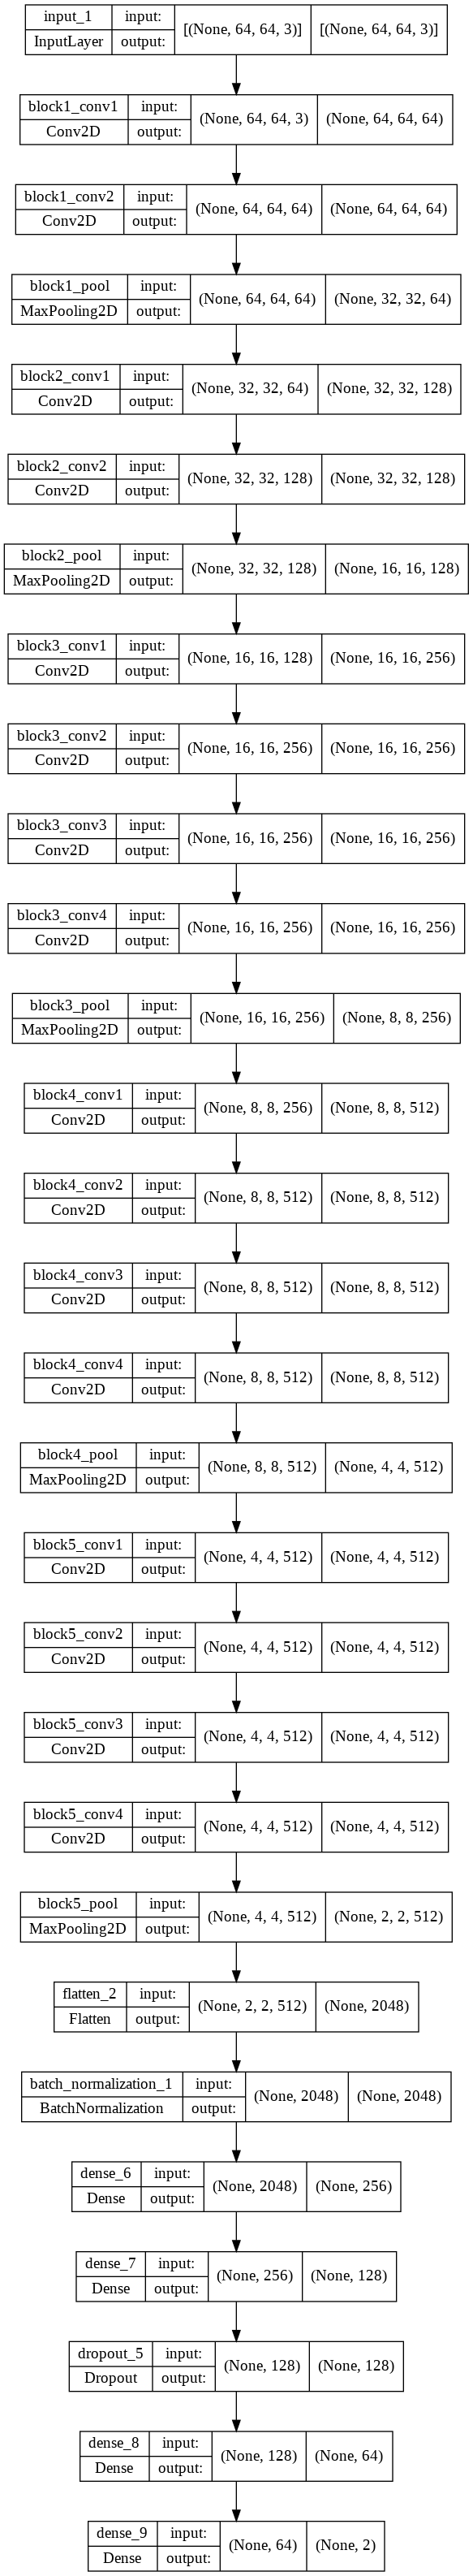

In [ ]:
plot_model(model4a, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
# Compile the model 
adam = optimizers.Adam(learning_rate = 1e-5)
model4a.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

In [ ]:
# Fit and run the model for 10 epochs
history4a = model4a.fit(
            train_images, train_labels,
            epochs= 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1)

Epoch 1/10
624/624 [==============================] - 12s 17ms/step - loss: 0.2415 - accuracy: 0.8992 - val_loss: 0.1950 - val_accuracy: 0.9437
Epoch 2/10
624/624 [==============================] - 10s 16ms/step - loss: 0.1838 - accuracy: 0.9239 - val_loss: 0.2498 - val_accuracy: 0.9325
Epoch 3/10
624/624 [==============================] - 10s 16ms/step - loss: 0.1646 - accuracy: 0.9351 - val_loss: 0.1576 - val_accuracy: 0.9619
Epoch 4/10
624/624 [==============================] - 10s 17ms/step - loss: 0.1507 - accuracy: 0.9393 - val_loss: 0.1945 - val_accuracy: 0.9571
Epoch 5/10
624/624 [==============================] - 10s 16ms/step - loss: 0.1297 - accuracy: 0.9493 - val_loss: 0.2651 - val_accuracy: 0.9345
Epoch 6/10
624/624 [==============================] - 10s 17ms/step - loss: 0.1209 - accuracy: 0.9535 - val_loss: 0.3175 - val_accuracy: 0.9125
Epoch 7/10
624/624 [==============================] - 10s 17ms/step - loss: 0.1083 - accuracy: 0.9591 - val_loss: 0.3347 - val_accuracy:

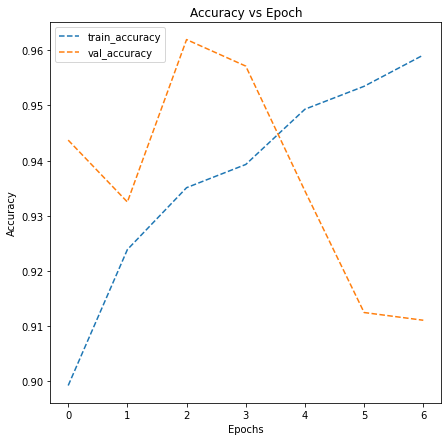

In [ ]:
# Plot the accuracies
def plot_accuracy(history):
    N = len(history4a.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), 
             history4a.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history4a.history["val_accuracy"], 
             label = "val_accuracy", 
             ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")
    plt.show()

plot_accuracy(history)

In [ ]:
# Evaluate the model on test data
accuracy = model4a.evaluate(test_images, 
                            test_labels, 
                            verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 13ms/step - loss: 0.2673 - accuracy: 0.9065

 Test_Accuracy:- 0.9065384864807129


              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1300
           1       0.87      0.96      0.91      1300

    accuracy                           0.91      2600
   macro avg       0.91      0.91      0.91      2600
weighted avg       0.91      0.91      0.91      2600



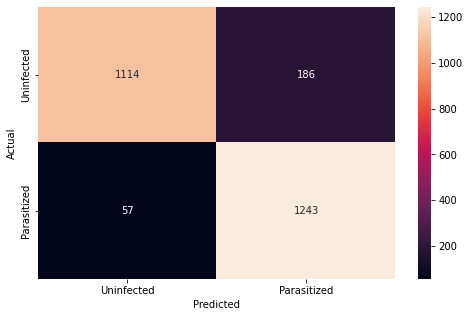

In [ ]:
pred4a = model4a.predict(test_images)
pred4a = np.argmax(pred4a, axis = 1) 
y_true4a = np.argmax(test_labels, axis = 1)

#Printing the classification report
print(classification_report(y_true4a, pred4a))

#Plotting the heatmap using confusion matrix
cm4a = confusion_matrix(y_true4a, pred4a)
plt.figure(figsize = (8,5))
sns.heatmap(cm4a, 
            annot = True,  
            fmt = '.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Model 5 - ResNet 50 (Pre-trained Model)**

In [ ]:
# Clear backend
backend.clear_session()

# Fix the seed for random number generators

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Model

RN50 = ResNet50(include_top = False, 
                weights = 'imagenet', 
                input_shape = (64,64,3))

In [ ]:
RN50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
# Retrieve a layer based on either its name (unique) or index
transfer_layer3 = RN50.get_layer('conv5_block3_out')

# Freeze the ResNet layers
# Set RN50.trainable to False moves all the layer's weights from trainable to non-trainable
RN50.trainable = False

In [ ]:
# Add classification layers afterward   
x = Flatten()(transfer_layer3.output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

pred4b = Dense(2, activation='softmax')(x)
model4b = Model(RN50.input, pred4b) # Initialize the model
# We've tried 0.1, 0.2 and 0.3 for dropout
# We've tried 256, 128, 64

In [ ]:
RN50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

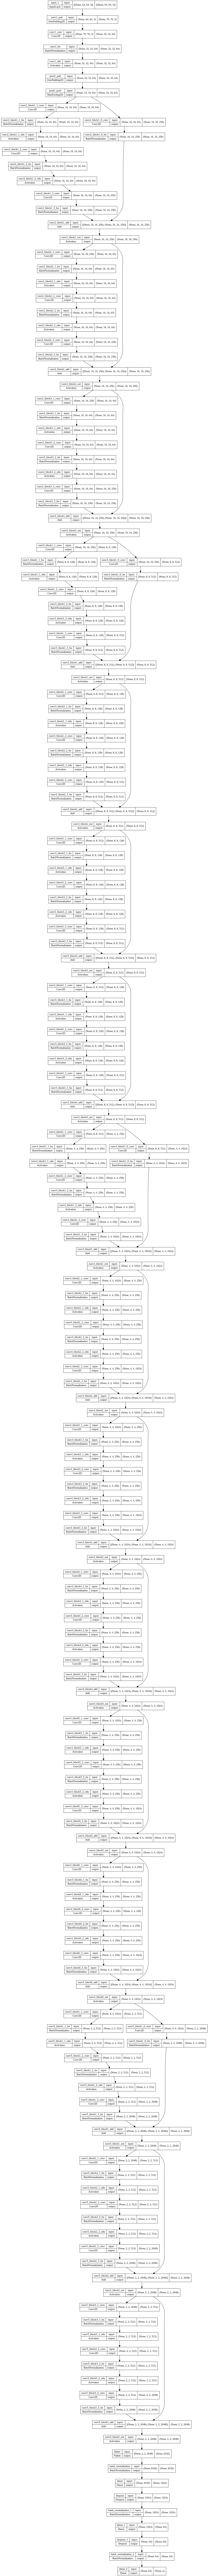

In [ ]:
plot_model(model4b, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
# Compile the model 
sgd = optimizers.SGD(learning_rate = 1e-5)
model4b.compile(optimizer = 'sgd', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

In [ ]:
# Fit the model and running the model for 10 epochs
history4b = model4b.fit(
            train_images, 
            train_labels,
            epochs = 10,
            callbacks= callbacks,
            batch_size = 16,
            validation_split = 0.1,
            verbose = 1)

# Change batch_size 16, 32 and 64. 64 got the best result, but very tiny improvement

Epoch 1/10
1404/1404 [==============================] - 26s 15ms/step - loss: 0.6821 - accuracy: 0.6306 - val_loss: 0.6833 - val_accuracy: 0.6082
Epoch 2/10
1404/1404 [==============================] - 21s 15ms/step - loss: 0.6043 - accuracy: 0.6801 - val_loss: 0.6679 - val_accuracy: 0.6106
Epoch 3/10
1404/1404 [==============================] - 21s 15ms/step - loss: 0.5889 - accuracy: 0.6921 - val_loss: 0.6264 - val_accuracy: 0.6386
Epoch 4/10
1404/1404 [==============================] - 21s 15ms/step - loss: 0.5764 - accuracy: 0.6998 - val_loss: 0.6295 - val_accuracy: 0.6310
Epoch 5/10
1404/1404 [==============================] - 21s 15ms/step - loss: 0.5697 - accuracy: 0.7055 - val_loss: 0.6069 - val_accuracy: 0.6631
Epoch 6/10
1404/1404 [==============================] - 21s 15ms/step - loss: 0.5644 - accuracy: 0.7096 - val_loss: 0.6198 - val_accuracy: 0.6522
Epoch 7/10
1404/1404 [==============================] - 21s 15ms/step - loss: 0.5603 - accuracy: 0.7132 - val_loss: 0.6196 -

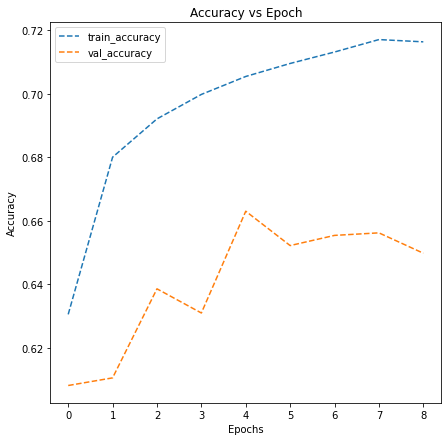

In [ ]:
# Plot the accuracies
def plot_accuracy(history):
    N = len(history4b.history["accuracy"])
    plt.figure(figsize = (7,7))
    plt.plot(np.arange(0, N), 
             history4b.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history4b.history["val_accuracy"], 
             label = "val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc = "upper left")
    plt.show()

plot_accuracy(history)

In [ ]:
accuracy = model4b.evaluate(test_images, 
                            test_labels, 
                            verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 2s 17ms/step - loss: 0.5412 - accuracy: 0.7304

 Test_Accuracy:- 0.7303845882415771


              precision    recall  f1-score   support

           0       0.82      0.59      0.69      1300
           1       0.68      0.87      0.76      1300

    accuracy                           0.73      2600
   macro avg       0.75      0.73      0.72      2600
weighted avg       0.75      0.73      0.72      2600



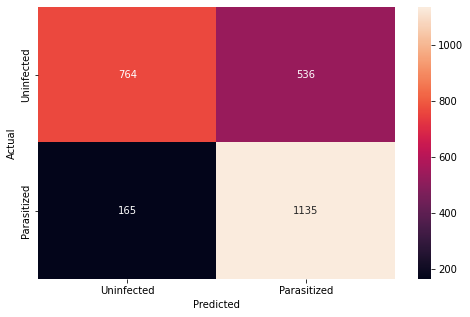

In [ ]:
pred4b = model4b.predict(test_images)
pred4b = np.argmax(pred4b,axis = 1) 
y_true4b = np.argmax(test_labels, axis = 1)

# Print the classification report
print(classification_report(y_true4b, pred4b))

# Plot the heatmap using confusion matrix
cm4b = confusion_matrix(y_true4b, pred4b)
plt.figure(figsize=(8,5))
sns.heatmap(cm4b, 
            annot = True,  
            fmt = '.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Model 5 Aug. - ResNet 50 + Data Augmentation (Pre-trained Model)**

In [ ]:
backend.clear_session()

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Model

RN50_Aug = ResNet50(include_top = False, 
                weights = 'imagenet', 
                input_shape = (64,64,3))

In [ ]:
RN50_Aug.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
# Retrieve a layer based on either its name (unique) or index
transfer_layer3_Aug = RN50_Aug.get_layer('conv5_block3_out')

# Freeze the ResNet layers
# Set RN50_Aug.trainable to False moves all the layer's weights from trainable to non-trainable
RN50_Aug.trainable = False

In [ ]:
# Add classification layers afterward   
x = Flatten()(transfer_layer3_Aug.output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

pred4b_Aug = Dense(2, activation='softmax')(x)
model4b_Aug = Model(RN50_Aug.input, pred4b_Aug) # Initialize the model
# We've tried 0.1, 0.2 and 0.3 for dropout

In [ ]:
# Compile the model 
sgd = optimizers.SGD(learning_rate = 1e-5)
model4b_Aug.compile(optimizer = 'sgd', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

In [ ]:
# Fit the model and running the model for 10 epochs
history4b_Aug = model4b_Aug.fit(train_generator, 
                      validation_data = val_generator,
                      epochs = 10,
                      callbacks= callbacks,
                      batch_size = 16,
                      verbose = 1)

# Change batch_size 16, 32 and 64. 64 got the best result, but very tiny improvement

Epoch 1/10
390/390 [==============================] - 30s 67ms/step - loss: 0.7895 - accuracy: 0.5538 - val_loss: 0.6667 - val_accuracy: 0.5846
Epoch 2/10
390/390 [==============================] - 25s 64ms/step - loss: 0.7233 - accuracy: 0.5812 - val_loss: 0.6666 - val_accuracy: 0.5869
Epoch 3/10
390/390 [==============================] - 25s 65ms/step - loss: 0.6926 - accuracy: 0.5936 - val_loss: 0.6504 - val_accuracy: 0.6108
Epoch 4/10
390/390 [==============================] - 25s 64ms/step - loss: 0.6718 - accuracy: 0.6058 - val_loss: 0.6491 - val_accuracy: 0.6077
Epoch 5/10
390/390 [==============================] - 25s 65ms/step - loss: 0.6641 - accuracy: 0.6105 - val_loss: 0.6449 - val_accuracy: 0.6138
Epoch 6/10
390/390 [==============================] - 25s 64ms/step - loss: 0.6538 - accuracy: 0.6171 - val_loss: 0.6453 - val_accuracy: 0.6138
Epoch 7/10
390/390 [==============================] - 25s 64ms/step - loss: 0.6465 - accuracy: 0.6249 - val_loss: 0.6353 - val_accuracy:

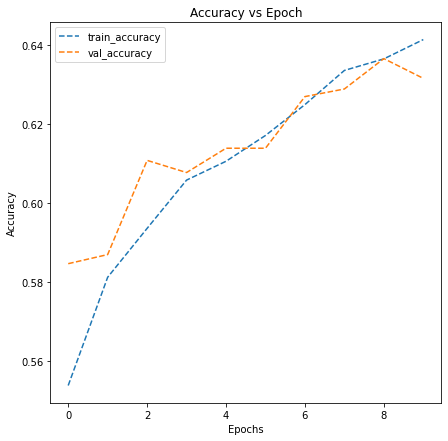

In [ ]:
# Plot the accuracies
def plot_accuracy(history):
    N = len(history4b_Aug.history["accuracy"])
    plt.figure(figsize = (7,7))
    plt.plot(np.arange(0, N), 
             history4b_Aug.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history4b_Aug.history["val_accuracy"], 
             label = "val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc = "upper left")
    plt.show()

plot_accuracy(history)

In [ ]:
accuracy = model4b_Aug.evaluate(test_images, 
                            test_labels, 
                            verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 2s 16ms/step - loss: 0.6349 - accuracy: 0.6315

 Test_Accuracy:- 0.631538450717926


              precision    recall  f1-score   support

           0       0.59      0.83      0.69      1300
           1       0.72      0.44      0.54      1300

    accuracy                           0.63      2600
   macro avg       0.66      0.63      0.62      2600
weighted avg       0.66      0.63      0.62      2600



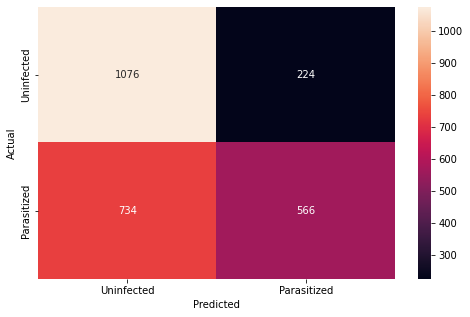

In [ ]:
pred4b_Aug = model4b_Aug.predict(test_images)
pred4b_Aug = np.argmax(pred4b_Aug,axis = 1) 
y_true4b_Aug = np.argmax(test_labels, axis = 1)

# Print the classification report
print(classification_report(y_true4b_Aug, pred4b_Aug))

# Plot the heatmap using confusion matrix
cm4b_Aug = confusion_matrix(y_true4b_Aug, pred4b_Aug)
plt.figure(figsize=(8,5))
sns.heatmap(cm4b_Aug, 
            annot = True,  
            fmt = '.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Model 4c - ResNet 101 (Pre-trained Model)**

In [ ]:
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras import Model

RN101 = ResNet101(include_top = False, 
                  weights = 'imagenet', 
                  input_shape = (64,64,3))

In [ ]:
RN101.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

In [ ]:
# Retrieve a layer based on either its name (unique) or index
transfer_layer4 = RN101.get_layer('conv5_block3_out')

# Freeze the ResNet layers
# Set RN101.trainable to False moves all the layer's weights from trainable to non-trainable
RN101.trainable = False

In [ ]:
# Add classification layers afterward   
x = Flatten()(transfer_layer4.output)
x = BatchNormalization()(x)
x = Dense(1024, activation='LeakyReLU')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='LeakyReLU')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='LeakyReLU')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

pred4c = Dense(2, activation='softmax')(x)
model4c = Model(RN101.input, pred4c) 


In [ ]:
RN101.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

In [ ]:
plot_model(model4c, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
# Compile the model 
adam = optimizers.Adam(learning_rate= 1e-5)
model4c.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

In [ ]:
# Fit and run the model for 10 epochs
history4c = model4c.fit(
            train_images, train_labels,
            epochs= 10,
            callbacks= callbacks,
            batch_size= 16,
            validation_split=0.1,
            verbose=1)


Epoch 1/10
1404/1404 [==============================] - 42s 26ms/step - loss: 0.6369 - accuracy: 0.6588 - val_loss: 0.6825 - val_accuracy: 0.5801
Epoch 2/10
1404/1404 [==============================] - 34s 24ms/step - loss: 0.5917 - accuracy: 0.6901 - val_loss: 0.7785 - val_accuracy: 0.4924
Epoch 3/10
1404/1404 [==============================] - 34s 24ms/step - loss: 0.5814 - accuracy: 0.6982 - val_loss: 0.5530 - val_accuracy: 0.6787
Epoch 4/10
1404/1404 [==============================] - 34s 24ms/step - loss: 0.5753 - accuracy: 0.6994 - val_loss: 0.6820 - val_accuracy: 0.5737
Epoch 5/10
1404/1404 [==============================] - 34s 24ms/step - loss: 0.5684 - accuracy: 0.7049 - val_loss: 0.7063 - val_accuracy: 0.5785
Epoch 6/10
1404/1404 [==============================] - 34s 24ms/step - loss: 0.5646 - accuracy: 0.7099 - val_loss: 0.6270 - val_accuracy: 0.6226
Epoch 7/10
1404/1404 [==============================] - 34s 24ms/step - loss: 0.5647 - accuracy: 0.7082 - val_loss: 0.6725 -

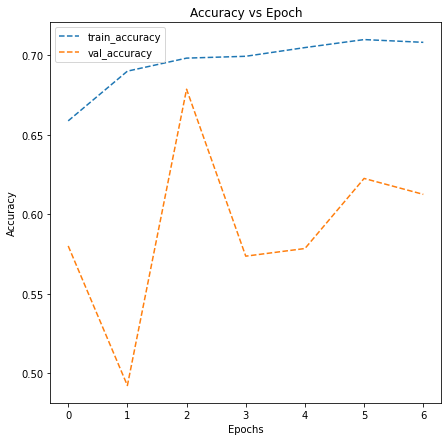

In [ ]:
# Plot the accuracies

def plot_accuracy(history):
    N = len(history4c.history["accuracy"])
    plt.figure(figsize = (7,7))
    plt.plot(np.arange(0, N), 
             history4c.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history4c.history["val_accuracy"], 
             label = "val_accuracy", 
             ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")
    plt.show()

plot_accuracy(history)

In [ ]:
accuracy = model4c.evaluate(test_images, 
                            test_labels, 
                            verbose=1)
print('\n', 
      'Test_Accuracy:-', 
      accuracy[1])

82/82 [==============================] - 4s 28ms/step - loss: 0.5959 - accuracy: 0.6923

 Test_Accuracy:- 0.692307710647583


              precision    recall  f1-score   support

           0       0.76      0.56      0.64      1300
           1       0.65      0.83      0.73      1300

    accuracy                           0.69      2600
   macro avg       0.71      0.69      0.69      2600
weighted avg       0.71      0.69      0.69      2600



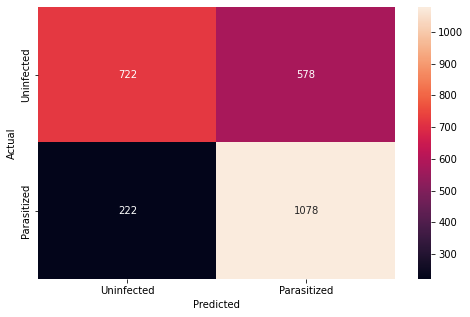

In [ ]:
pred4c = model4c.predict(test_images)
pred4c = np.argmax(pred4c,axis = 1) 
y_true4c = np.argmax(test_labels, axis = 1)

# Print the classification report
print(classification_report(y_true4c, pred4c))

# Plot the heatmap using confusion matrix
cm4c = confusion_matrix(y_true4c, pred4c)
plt.figure(figsize = (8,5))
sns.heatmap(cm4c, 
            annot = True,  
            fmt = '.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Model 4d - DenseNet121 (Pre-trained Model)**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import Model

DN121 = DenseNet121(include_top = False, 
                    weights = 'imagenet', 
                    input_shape = (64,64,3))

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
# Retrieve a layer based on either its name (unique) or index
transfer_layer5 = DN121.get_layer('relu')

# Freeze the DenseNet layers
# Set DN121.trainable to False moves all the layer's weights from trainable to non-trainable
DN121.trainable = False

In [ ]:
# Add classification layers afterward   
x = Flatten()(transfer_layer5.output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred4d = Dense(2, activation='softmax')(x)
model4d = Model(DN121.input, pred4d) 

# We've tried 0.1, 0.2 and 0.3 for dropout, similar
# We've tried 256, 128, 64

In [ ]:
DN121.summary()

In [ ]:
plot_model(model4d, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
# Compile the model 
adam = optimizers.Adam(learning_rate= 1e-3)
model4d.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

In [ ]:
# Fit and runn the model for 10 epochs
history4d = model4d.fit(
            train_images, 
            train_labels,
            epochs= 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split=0.1,
            verbose=1)

# Change batch_size 16, 32 and 64. 64 got the best result, but very tiny improvement

Epoch 1/10
702/702 [==============================] - 22s 22ms/step - loss: 0.1656 - accuracy: 0.9381 - val_loss: 0.0930 - val_accuracy: 0.9736
Epoch 2/10
702/702 [==============================] - 13s 19ms/step - loss: 0.1233 - accuracy: 0.9545 - val_loss: 0.1404 - val_accuracy: 0.9539
Epoch 3/10
702/702 [==============================] - 14s 20ms/step - loss: 0.1083 - accuracy: 0.9600 - val_loss: 0.0730 - val_accuracy: 0.9740
Epoch 4/10
702/702 [==============================] - 14s 20ms/step - loss: 0.0998 - accuracy: 0.9620 - val_loss: 0.0620 - val_accuracy: 0.9776
Epoch 5/10
702/702 [==============================] - 13s 19ms/step - loss: 0.0902 - accuracy: 0.9660 - val_loss: 0.0818 - val_accuracy: 0.9712
Epoch 6/10
702/702 [==============================] - 14s 20ms/step - loss: 0.0813 - accuracy: 0.9713 - val_loss: 0.0543 - val_accuracy: 0.9824
Epoch 7/10
702/702 [==============================] - 13s 19ms/step - loss: 0.0744 - accuracy: 0.9720 - val_loss: 0.0753 - val_accuracy:

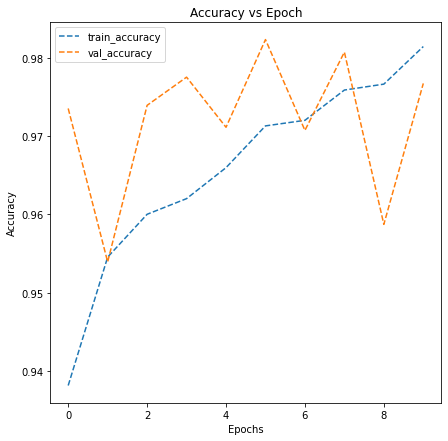

In [ ]:
# plot the accuracies

def plot_accuracy(history):
    N = len(history4d.history["accuracy"])
    plt.figure(figsize = (7,7))
    plt.plot(np.arange(0, N), 
             history4d.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history4d.history["val_accuracy"], 
             label = "val_accuracy", 
             ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc = "upper left")
    plt.show()
plot_accuracy(history)

In [ ]:
accuracy = model4d.evaluate(test_images, 
                            test_labels, 
                            verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 3s 20ms/step - loss: 0.1227 - accuracy: 0.9569

 Test_Accuracy:- 0.9569230675697327


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1300
           1       0.96      0.95      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



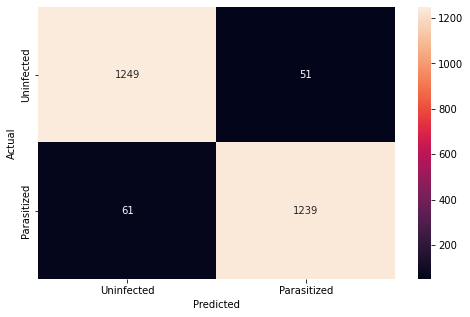

In [ ]:
pred4d = model4d.predict(test_images)
pred4d = np.argmax(pred4d,axis = 1) 
y_true4d = np.argmax(test_labels, axis = 1)

# Print the classification report
print(classification_report(y_true4d, pred4d))

# Plot the heatmap using confusion matrix
cm4d = confusion_matrix(y_true4d, pred4d)
plt.figure(figsize = (8,5))
sns.heatmap(cm4d, 
            annot = True,  
            fmt ='.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Model 4d Aug. - DenseNet201 + Data Augmentation (Pre-trained model)**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import Model

DN121_Aug = DenseNet121(include_top = False, 
                    weights = 'imagenet', 
                    input_shape = (64,64,3))

In [ ]:
# Clear backend
backend.clear_session()

# Fix the seed for random number generators

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Retrieve a layer based on either its name (unique) or index
transfer_layer5_Aug = DN121_Aug.get_layer('relu')

# Freeze the DenseNet layers
# Set DN121_Aug.trainable to False moves all the layer's weights from trainable to non-trainable
DN121_Aug.trainable = False

In [ ]:
# Add classification layers afterward   
x = Flatten()(transfer_layer5_Aug.output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred4d_Aug = Dense(2, activation='softmax')(x)
model4d_Aug = Model(DN121_Aug.input, pred4d_Aug) 

# We've tried 0.1, 0.2 and 0.3 for dropout, similar
# We've tried 256, 128, 64

In [ ]:
DN121_Aug.summary()

In [ ]:
plot_model(model4d_Aug, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
# Compile the model 
adam = optimizers.Adam(learning_rate= 1e-3)
model4d_Aug.compile(optimizer = 'adam', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

In [ ]:
# Fit and runn the model for 10 epochs
history4d_Aug = model4d_Aug.fit(
            train_images, 
            train_labels,
            epochs= 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split=0.1,
            verbose=1)

# Change batch_size 16, 32 and 64. 64 got the best result, but very tiny improvement

Epoch 1/10
702/702 [==============================] - 22s 21ms/step - loss: 0.1663 - accuracy: 0.9387 - val_loss: 0.0852 - val_accuracy: 0.9744
Epoch 2/10
702/702 [==============================] - 13s 19ms/step - loss: 0.1235 - accuracy: 0.9544 - val_loss: 0.1554 - val_accuracy: 0.9455
Epoch 3/10
702/702 [==============================] - 13s 19ms/step - loss: 0.1087 - accuracy: 0.9596 - val_loss: 0.0621 - val_accuracy: 0.9764
Epoch 4/10
702/702 [==============================] - 14s 20ms/step - loss: 0.1015 - accuracy: 0.9619 - val_loss: 0.0535 - val_accuracy: 0.9804
Epoch 5/10
702/702 [==============================] - 13s 19ms/step - loss: 0.0921 - accuracy: 0.9658 - val_loss: 0.0840 - val_accuracy: 0.9724
Epoch 6/10
702/702 [==============================] - 13s 19ms/step - loss: 0.0851 - accuracy: 0.9693 - val_loss: 0.0667 - val_accuracy: 0.9748
Epoch 7/10
702/702 [==============================] - 13s 19ms/step - loss: 0.0773 - accuracy: 0.9706 - val_loss: 0.0662 - val_accuracy:

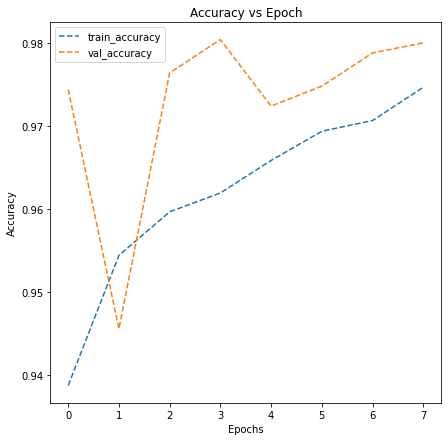

In [ ]:
# plot the accuracies

def plot_accuracy(history):
    N = len(history4d_Aug.history["accuracy"])
    plt.figure(figsize = (7,7))
    plt.plot(np.arange(0, N), 
             history4d_Aug.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history4d_Aug.history["val_accuracy"], 
             label = "val_accuracy", 
             ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc = "upper left")
    plt.show()
plot_accuracy(history)

In [ ]:
accuracy = model4d_Aug.evaluate(test_images, 
                            test_labels, 
                            verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 4s 20ms/step - loss: 0.1179 - accuracy: 0.9569

 Test_Accuracy:- 0.9569230675697327


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1300
           1       0.96      0.95      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



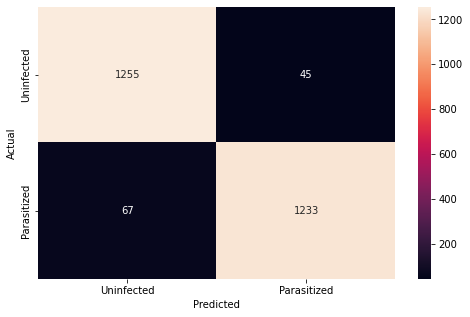

In [ ]:
pred4d_Aug = model4d_Aug.predict(test_images)
pred4d_Aug = np.argmax(pred4d_Aug,axis = 1) 
y_true4d_Aug = np.argmax(test_labels, axis = 1)

# Print the classification report
print(classification_report(y_true4d_Aug, pred4d_Aug))

# Plot the heatmap using confusion matrix
cm4d_Aug = confusion_matrix(y_true4d_Aug, pred4d_Aug)
plt.figure(figsize = (8,5))
sns.heatmap(cm4d_Aug, 
            annot = True,  
            fmt ='.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Model 4e - DenseNet201 (Pre-trained model)**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras import Model

DN201 = DenseNet201(include_top = False, 
                    weights = 'imagenet', 
                    input_shape = (64,64,3))

74850304/74836368 [==============================] - 0s 0us/step


In [ ]:
DN201.summary()

In [ ]:
# Retrieve a layer based on either its name (unique) or index
transfer_layer6 = DN201.get_layer('relu')
# Freeze the DenseNet layers
# Set DN201.trainable to False moves all the layer's weights from trainable to non-trainable
DN201.trainable = False

In [ ]:
# Add classification layers afterward   
x = Flatten()(transfer_layer6.output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
pred4e = Dense(2, activation='softmax')(x)
model4e = Model(DN201.input, pred4e)

# We've tried 0.1, 0.2 and 0.3 for dropout, similar
# We've tried 256, 128, 64

In [ ]:
plot_model(model4e, 
           show_shapes = True, 
           show_layer_names = True)

In [ ]:
# Compile the model 
sgd = optimizers.SGD(learning_rate= 1e-3)
model4e.compile(optimizer = 'sgd', 
                loss = 'binary_crossentropy', 
                metrics = (['accuracy']))

In [ ]:
# Fit and run the model for 10 epochs
history4e = model4e.fit(
            train_images, 
            train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 16,
            validation_split = 0.1,
            verbose=1)

# Change batch_size 16, 32 and 64. 64 got the best result, but very tiny improvement

Epoch 1/10
1404/1404 [==============================] - 56s 33ms/step - loss: 0.2780 - accuracy: 0.8936 - val_loss: 0.1180 - val_accuracy: 0.9671
Epoch 2/10
1404/1404 [==============================] - 40s 29ms/step - loss: 0.2092 - accuracy: 0.9218 - val_loss: 0.1025 - val_accuracy: 0.9688
Epoch 3/10
1404/1404 [==============================] - 43s 31ms/step - loss: 0.1950 - accuracy: 0.9252 - val_loss: 0.0988 - val_accuracy: 0.9712
Epoch 4/10
1404/1404 [==============================] - 46s 33ms/step - loss: 0.1888 - accuracy: 0.9284 - val_loss: 0.0970 - val_accuracy: 0.9708
Epoch 5/10
1404/1404 [==============================] - 40s 28ms/step - loss: 0.1782 - accuracy: 0.9334 - val_loss: 0.0965 - val_accuracy: 0.9716
Epoch 6/10
1404/1404 [==============================] - 44s 31ms/step - loss: 0.1768 - accuracy: 0.9327 - val_loss: 0.0979 - val_accuracy: 0.9716
Epoch 7/10
1404/1404 [==============================] - 41s 29ms/step - loss: 0.1753 - accuracy: 0.9338 - val_loss: 0.0910 -

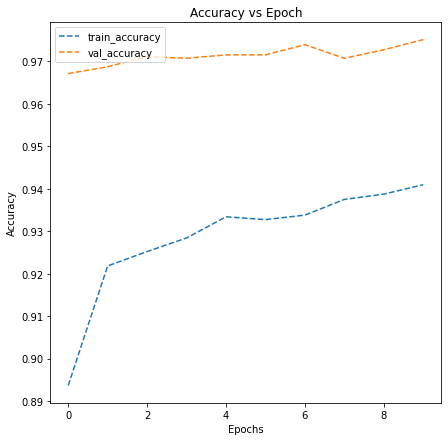

In [ ]:
# Plot the accuracies
def plot_accuracy(history):
    N = len(history4e.history["accuracy"])
    plt.figure(figsize = (7,7))
    plt.plot(np.arange(0, N), 
             history4e.history["accuracy"], 
             label = "train_accuracy", 
             ls = '--')
    plt.plot(np.arange(0, N), 
             history4e.history["val_accuracy"], 
             label = "val_accuracy", 
             ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc = "upper left")
    plt.show()
plot_accuracy(history)

In [ ]:
accuracy = model4e.evaluate(test_images, 
                            test_labels, 
                            verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 5s 27ms/step - loss: 0.1231 - accuracy: 0.9535

 Test_Accuracy:- 0.9534615278244019


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1300
           1       0.96      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



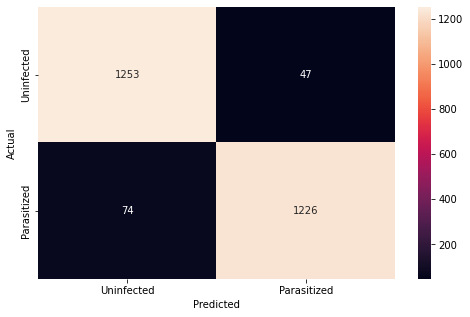

In [ ]:
pred4e = model4e.predict(test_images)
pred4e = np.argmax(pred4e, axis = 1) 
y_true4e = np.argmax(test_labels, axis = 1)

# Print the classification report
print(classification_report(y_true4e, pred4e))

# Plot the heatmap using confusion matrix
cm4e = confusion_matrix(y_true4e, pred4e)
plt.figure(figsize=(8,5))
sns.heatmap(cm4e, 
            annot = True,  
            fmt = '.0f', 
            xticklabels = ['Uninfected', 'Parasitized'], 
            yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Observations and Insights**

The most meaningful insight from the data relevant to the problem

* **Image/Unstructured** - Whenever the data is image/unstructured, we need different approaches in comparison to simple structured data to deal with
* **Color image** - In comparison to 1 channel grayscale image, we use 3 channels (RGB) to transform into the data to represent
* **Large volume** - the 28K color digital images. It’s suitable for the Deep Learning CNN model to have a automatic detection system to solve the problem
* **Two classes** - For two classes (versus multiple even 10, or 100 classes), the learning model may not require too deep (i.e. too many layers) to deal with
* **Balanced data** - It’s crucial for us if further re-sampling/SMOTE operation needed when it's unbalanced.
* **Visualization** - Giemsa Stain mark is the key. All the cell color, shape, texture, size, curve, edge are not the factors to influence classification
* **Augmentation may not improve too much** - Rotation, zoom and flip don’t add on to accuracy in our trial run. The data seems dynamic without a specific pattern to catch by our augmentation yet

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?



####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
* **No model is perfect - Biz factors matter!**

* **1. Highest Recall (Less False Negative)**
Batch Normalization + LearkyReLU 100% outshines
* **2. Highest Test Accuracy:(Overall accuracy)**
Base Model 98% beats every other model
* **3. Highest Speed:(Less Time)**
Deeper Layer Model with 3 epochs and 28 sec only (Under Colab GPU mode)
* **4. Fastest Model Build-up (Pre-train Time Saving)**
VGG16 Pre-trained model pre-trains the most of the layers already to do image classification (since the performances are very close)

* **The Final Solution Design Decision depends on the business need**


# **FINAL CAPSTON PROJECT REPORT**

## **1. KEY TAKEAWAYS** - CNN Solves the Malaria Detection Issues with 99% Successful Rate
* **CNN Solves Malaria Detection With 99% Successful Rate** - In our best model, we could reach only ~ 1% error rate from all 3 measurements: 
 * **1) False Negative (Recall)**, 
 * **2) Avg. of False Negative & False Positive (F1 score)** 
 * **3) Overall Testing Error (Test Accuracy)**
<br> We could claim Deep Learning is a successful solution for Malaria Detection
* **Application Needs Will  Decide the Measurements and Model Selection** - Application or business needs to consider the benefit and cost on 
 * **1) Model Maintenance and Potential** 
 * **2) Model Running Time and Related Cost** 
 * **3) Model Accuracy from Various Aspects** 
* **6 Pre-trained Models Offer the Window of Opp to Save Time and Efforts** - 6 various series of pre-trained models in 3 series with different pro and con to experiment. Some of them could be effective with saving a huge time and efforts in fine-tuning with great potential
* **Within 14 Models + Data Augmentation, we Offer the Portfolio for Pick and Choose** - After exploration of ANN, CNN, Deeper, Data Augmentation, Hyperparameter tuning and various pre-trained models, we come out Portfolio for Decision Maker to Pick and Choose.

## **2. KEY NEXT STEPS** - Implementation while More Model Explorations to Try

* **Different Production/Cloud Provider** - Compare time, expense and performance. AWS or Microsoft Azure, or GCP Since Cloud Provider could offer efficiency of production including: 1) Data storage and retrieval 2) Frameworks and tooling 3) Feedback and iteratio

* **Different Pre-trained model** - Compare performances from Inception, EfficientNet and AlexNet
* **Starting from Scratch of Image Labelling** - Miss-labelling Images could be the source to keep improving the error rate

## **3. PROBLEM SUMMARY** - CNN Automation Beats Human Eyes, Save Time and Flexible Anytime Anywhere

* **Can CNN Automation Perform Better than Human Eyes?** - Yes, We have more than 4 models can beat the traditional 95.8% recall/sensitivity rate and go up to 99%

* **Can CNN Save Time and Efforts?** - Yes, our model runs 25K+ images with less than 1 minute. Human eyes may need at least 3 second per image, which takes 75K second, which requires one man non-stop working 8 hours for 3 days.

* **Can CNN Be Applied Anytime Anywhere?** - Yes. CNN’s model could be ran whenever the computing devices could have internet connection. The web-based Jupyter or Colab would be utilized anytime anywhere

* **Can CNN Offer Options for Decision-maker Pick & Choose?** - Yes. We ran 11 models to find out a portfolio to meet various measurements of success 

## **4. SOLUTION SUMMARY** - Base and Deeper CNN, Augmentation, VGG 16 and DenseNet 121 Outshine

* **1. ANN Model** - To make sure there's a comparison, we tested ANN model first. It's very obvious that even we give ANN 30 epochs to train, the test accuracy/recall can only reach 64%/58%. It's sure thing that for the image classfication like Malaria Detection, ANN is not an appropriate approach.
* **2. Base Model** - In the CNN with 13 layers, we utilize Conv2D, MaxPooling2D, Dropout, Flatten and Dense layers. Fundamentally we do the Convolution2D with 32 filters, 2x2 kernels, Relu activations function and MaxPolling2D the dropout 20% the same 3 times, then flat and output. With this compact models, we reach test accuracy and recall 99%/99% in 9 epochs. It’s an amazing start as a base model
* **3. Deeper Layer Model** - To experiment if “the deeper; the better” . We purely repeat 3 more times the pattern before flatten layer and everything else is the same. The total 22 layer-model gives us very similar test accuracy and recall 98%/98% in total 10 epochs. We may draw the conclusion that there’s NO “the deeper; the better”
* **4. Batch Normalization Replacement + LeakyReLU Model** - From the base model, we try the batch normalization to avoid dropout and we we also replace Relu from LeakyReLU activation function - which makes the slope to solve “zero” issue for being stuck in local minimum. The 11-layer model shows test accuracy and recall 97%/95%  in 4 epochs. 
* **5. Base Model with Data Augmentation** - To experiment if “data augmentation” could help. We utilize the imagegenerator with parameters to finetune 3 out of the 5 potential factors: flip, zoom and rotation. The total 13-layer model gives us test accuracy and recall 98%/98% in total 10 epochs. It looks at least the factors we tried still can’t beat the base model
* **6. Pre-trained Model VGG16 (Transfer Learning)** - We took the 16-convolution-layer VGG16 model from block5 and add on our layers to process transfer learning. The total 26-layer model shows us test accuracy and recall 95%/95% in total 6 epochs. While we’re borrowing the power of the pre-trained model, it saves us the time and effort since we don’t need to build up and do various kinds of experiments. It gives us a direct result which is not too bad from the previous models of various attempts. 
* **7. Pre-trained Model VGG16 (Transfer Learning) with Data Augmentation** - Though recall shows 98% which is awesome, but the overall f1 score 80% and test accuracy 87% brings back the second screening issues for a lot of false-alarm from the very low precision. We won't consider it's a success.
* **8. Pre-trained Model VGG19 (Transfer Learning)** - The longer version (26-layer) VGG 19 model is a comparison if it's better than VGG 16. The result shows the more complex model did not bring back better performances.
* **9. Pre-trained Model ResNet 50 (Transfer Learning)** - We took the famous Residual Network model ResNEt 50. The total 62-layer model shows us test accuracy and recall 73%/87% in total 9 epochs. While we’re borrowing the power of the pre-trained model, it saves us the time and effort since we don’t need to build up and do various kinds of experiments. However, we won't consider ResNet 50 due to relative weak performance in this case.
* **10. Pre-trained Model ResNet 50 + Data Augmentation (Transfer Learning)** - Could data augmentation chances our statement regarding ResNet 50? The answer is no. It's even worse.
* **11. Pre-trained Model ResNet 101 (Transfer Learning)** - Could deeper verion ResNet 101 could change our statement regarding ResNet series? The answer is no. It's not getting better.
* **12. Pre-trained Model DenseNet 121 (Transfer Learning)** - We took the famous DenseNet model DenseNet 121. The total 130-layer model shows us test accuracy and recall 96%/95% in total 10 epochs. We love this experiment since it's the back-up plan of transfer model after VGG16. We believe DenseNet shows the efficiency and performance toward Malaria Detection.
* **13. Pre-trained Model DenseNet 121 + Data Augmentation (Transfer Learning)** - We decide to give it a try for data augmentation version of DenseNet121. The result is almost the same. Not better, but not worse.
* **14. Pre-trained Model DenseNet 201 (Transfer Learning)** - The final test is the deeper versino of DenseNet which is DenseNet 201. The result is slightly worse than the DenseNet 121. But it's still a good model though for this applicaiton case.

* **The Scope to improve the performance better** - We finetune as follows: 1) Activation function, 2) Kernel Size, 3) Batch Size, 4) Layer quantity, 5) Layer type, 6) Optimizer, 7) Factors of Data Augmentation, 8) Different Pre-train models, 9) Quantity of Neurons, 10) Learning Curve, 11) Dropout percentage those factors, 12) BatchNormalization or not, 13)Train/Validation Split, 14)Callbacks or not, 15) Patience, to do experiments to see the room to improve

## **5. SOLUTION VALIDATION** - Recall as our Top Measurements. F1 Score/Test Accuracy Follow to Validate the Solution Design - Base Model will win it all

We will strongly suggest to utilize the Base Model for the most simple and saving timea and efforts to reach the best recall, f1 score and test accuracy. However, if considering the variety, the deeper and data augmentation from the best model are all worthy to try. If transfer model is an option to keep exploration, then VGG 16 and DenseNet would be the candidate.

## **6. KEY RECOMMENDATIONS** - Prep for Infrastructure Readiness, Streamlining the Process and Relocate the Resources

### * **Key recommendations to implement the solution** - 
* **Computing Hardware Readiness:** - From a low-tier smartphone to any tablet, laptop to the hardcore PC
* **Internet Access Readiness:** - From WiFi to 5G/4G/3G to Starlink
* **Software/Application Readiness** -  Jupyter/Colab

### * **Key actionables for stakeholders** - CNN Malaria Detection is part of the screening process to classify the red blood cell for infection. Action items include:

* **Streamlining the whole screening process** - Preparing for the infrastructure of the CNN automation

* **Relocate the resources of manpower after CNN automation build-up**

## **7. FURTHER RECOMMENDATIONS** - Cost Benefit Analysis, Risk/Challenge Prep, Further Analysis and Other Associated Problems

* **Benefit:** 1) The saving of the time/efforts from manpower and 2) Lower rate of the error and the 3) Unified process and data management 
* **Cost:** 1) Implementation of the hardware, software and internet access, 2) Education/Communication and the streamline of the new CNN automation process
* **Risk/Challenge:** 1) Cybersecurity, 2) Data Management and Potential Data loss, 3) Crisis Management for the process paused/outrage by hardware, software or internet access issues
* **Further Analysis and Other Associated Problems:** As time goes by, the capability to predict may change, we need the back-up model to be ready. Augmentation and more pre-trained models are worthy to invest more resources



















 
